In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Covid_Analysis/covid_complete_cleansing.csv')

In [4]:
df.head()

,No,sex,age,Unit,nationality,risk,province_of_onset,age_bin,CountCase,announce_date,Notified_date,day,month,year,diff_date,diff_date_bin,one,Nationality,Region
0,1,Female,61.0,Year,China,ผู้ที่เดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,61-70,1,2020-01-12,NaN,12,1,2020,NaN,No data,1,Other,Central
1,2,Female,74.0,Year,China,ผู้ที่เดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,71-80,1,2020-01-17,NaN,17,1,2020,NaN,No data,1,Other,Central
2,3,Female,73.0,Year,Thai,ผู้ที่เดินทางมาจากต่างประเทศ,นครปฐม,71-80,1,2020-01-22,NaN,22,1,2020,NaN,No data,1,Thai,Central
3,4,Male,68.0,Year,China,ผู้ที่เดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,61-70,1,2020-01-22,NaN,22,1,2020,NaN,No data,1,Other,Central
4,5,Female,66.0,Year,China,ผู้ที่เดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,61-70,1,2020-01-24,NaN,24,1,2020,NaN,No data,1,Other,Central


In [5]:
del df['one']

In [6]:
print(df.shape)

(3377410, 18)


In [7]:
df.set_index('No', inplace=True)
df.head()

,sex,age,Unit,nationality,risk,province_of_onset,age_bin,CountCase,announce_date,Notified_date,day,month,year,diff_date,diff_date_bin,Nationality,Region
No,,,,,,,,,,,,,,,,,
1,Female,61.0,Year,China,ผู้ที่เดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,61-70,1,2020-01-12,NaN,12,1,2020,NaN,No data,Other,Central
2,Female,74.0,Year,China,ผู้ที่เดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,71-80,1,2020-01-17,NaN,17,1,2020,NaN,No data,Other,Central
3,Female,73.0,Year,Thai,ผู้ที่เดินทางมาจากต่างประเทศ,นครปฐม,71-80,1,2020-01-22,NaN,22,1,2020,NaN,No data,Thai,Central
4,Male,68.0,Year,China,ผู้ที่เดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,61-70,1,2020-01-22,NaN,22,1,2020,NaN,No data,Other,Central
5,Female,66.0,Year,China,ผู้ที่เดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,61-70,1,2020-01-24,NaN,24,1,2020,NaN,No data,Other,Central


In [8]:
timeS = pd.pivot_table(df,values=['CountCase'],index=['year','month','day'],aggfunc={'CountCase':'sum'})
#[(df.year==2022)]

add = []
for k,v in timeS.iterrows():
  add.append(k[0])
timeS['Year'] = add

add2 = []
for k,v in timeS.iterrows():
  add2.append(k[1])
timeS['Month'] = add2

add3 = []
for k,v in timeS.iterrows():
  add3.append(k[2])
timeS['Day'] = add3

timeS

CountCase  Year  Month  Day
year month day                             
2020 1     12           1  2020      1   12
           17           1  2020      1   17
           22           2  2020      1   22
           24           1  2020      1   24
           25           1  2020      1   25
...                   ...   ...    ...  ...
2022 3     17       25456  2022      3   17
           18       27071  2022      3   18
           19       25804  2022      3   19
           20       24996  2022      3   20
           21       23441  2022      3   21

[744 rows x 4 columns]

In [9]:
import plotly.express as px
fig = px.sunburst(timeS, path=['Year', 'Month'], values='CountCase',title = 'No. of Case by Year, month')

fig.update_layout(
    autosize=False,
    width=400,
    height=400,
    margin=dict(
        l=5,
        r=5,
        b=5,
        t=40,
        pad=5
    )
)

fig.show()

In [10]:
yearr = df[['year','CountCase']].groupby('year').sum()

add = []
for k,v in yearr.iterrows():
  add.append(k)
yearr['Year'] = add

yearr['No.of Case'] = yearr['CountCase']

yy = yearr['CountCase']/yearr['CountCase'].sum()*100
yearr['%'] = [int(y) for y in yy]
yearr

,CountCase,Year,No.of Case,%
year,,,,
2020,6884,2020,6884,0
2021,2216551,2021,2216551,65
2022,1153975,2022,1153975,34


In [11]:
import plotly.express as px
fig = px.bar(yearr, x='CountCase', y="Year", orientation='h',
             height=400)

fig.update_layout(
    autosize=False,
    width=450,
    height=300,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)
fig.show()

In [12]:
timeseall= pd.pivot_table(df[~df.diff_date.isin([">0"])],values=['CountCase'],index=['announce_date'],aggfunc={'CountCase':'sum'})

add = []
for k,v in timeseall.iterrows():
  add.append(k)
timeseall['Announce_date'] = add


timeseall

,CountCase,Announce_date
announce_date,,
2020-01-12,1,2020-01-12
2020-01-17,1,2020-01-17
2020-01-22,2,2020-01-22
2020-01-24,1,2020-01-24
2020-01-25,1,2020-01-25
...,...,...
2022-03-17,25456,2022-03-17
2022-03-18,27071,2022-03-18
2022-03-19,25804,2022-03-19


##Stat Q&A: No.1 วันที่ประกาศยอดผู้ติดเชื้อสูงที่สุด คือวันที่เท่าไหร่? และมีจำนวนกี่คน?

In [13]:
maxday = df[['announce_date','CountCase']].groupby('announce_date').sum()
print(f'วันที่ประกาศยอดผู้ติดเชื้อสูงที่สุด คือวันที่ 2022-03-18 จำนวน 27,071 คน')
maxday.sort_values(by = 'CountCase', ascending = False).head(1)

วันที่ประกาศยอดผู้ติดเชื้อสูงที่สุด คือวันที่ 2022-03-18 จำนวน 27,071 คน


,CountCase
announce_date,
2022-03-18,27071


In [14]:
import plotly.express as px
fig = px.line(timeseall, x='Announce_date', y=["CountCase"], 
              title = 'Daily New Case')

fig.update_layout(
    autosize=False,
    width=800,
    height=300,
    margin=dict(l=50,r=20,b=20,t=50,pad=4))
fig.show()

##Stat Q&A: No.2 อายุเฉลี่ยของผู้ที่ติดโควิดเป็นเท่าใด

In [15]:
df.age.agg(['mean','min','max'])

mean     35.387867
min       0.083333
max     119.000000
Name: age, dtype: float64

In [16]:
import plotly.express as px
fig = px.box(df, y="age",title = 'Boxplot of Age')
fig.update_layout(
    autosize=False,
    width=250,
    height=500,
    margin=dict(l=50,r=50,b=100,t=100,pad=4))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
AgeBin = pd.pivot_table(df,values='CountCase',index='age_bin',aggfunc='sum')
AgeBin['% of total'] = (AgeBin['CountCase']/AgeBin['CountCase'].sum())*100
AgeBin.sort_values('CountCase', inplace=True, ascending=False)
AgeBin

,CountCase,% of total
age_bin,,
21-30,709084,20.994904
31-40,619773,18.350541
41-50,479938,14.210238
51-60,343601,10.173506
11-20,340657,10.086338
1-10,282398,8.361378
No data,271368,8.034796
61-70,190561,5.642223
71-80,85475,2.530785


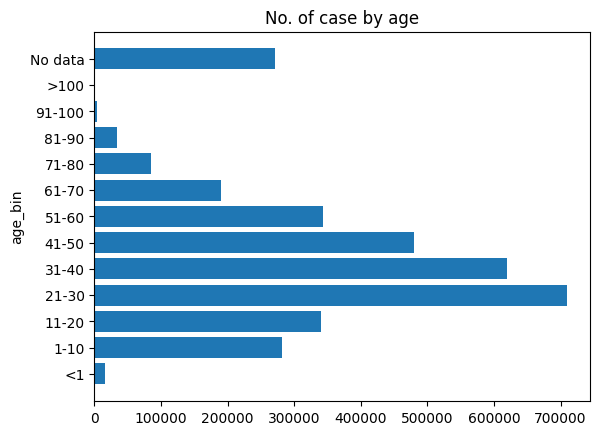

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = ['<1','1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','>100','No data']
performance = [15983, 282398, 340657, 709084, 619773, 479938, 343601, 190561, 85475, 33693, 4773, 165, 271309]


ax.barh(y_pos, performance,  align='center')
ax.set_ylabel('age_bin')
ax.set_title('No. of case by age')

plt.show()

*ส่วนใหญ่เป็นวัยทำงาน*

##Stat Q&A: No.3 ผู้ป่วยโควิดมีสัญชาติใดมากที่สุด และคิดเป็นสัดส่วนกี่%

In [19]:
area = pd.pivot_table(df,values=['CountCase'],index=['Nationality','Region','province_of_onset'],aggfunc={'CountCase':'sum'})

add = []
for k,v in area.iterrows():
  add.append(k[0])
area['nationality'] = add

add2 = []
for k,v in area.iterrows():
  add2.append(k[1])
area['region'] = add2

add3 = []
for k,v in area.iterrows():
  add3.append(k[2])
area['province'] = add3

area

CountCase nationality   region  \
Nationality Region  province_of_onset                                   
American    Central กรุงเทพมหานคร            516    American  Central   
                    กำแพงเพชร                  1    American  Central   
                    นครนายก                    1    American  Central   
                    นครปฐม                     1    American  Central   
                    นครสวรรค์                  4    American  Central   
...                                          ...         ...      ...   
Thai        West    กาญจนบุรี              20623        Thai     West   
                    ตาก                    24038        Thai     West   
                    ประจวบคีรีขันธ์        21395        Thai     West   
                    ราชบุรี                40980        Thai     West   
                    เพชรบุรี               24312        Thai     West   

                                              province  
Nationality Region  province_of_onset                   
American    Central กรุงเทพมหานคร        กรุงเทพมหานคร  
                    กำแพงเพชร                กำแพงเพชร  
                    นครนายก                    นครนายก  
                    นครปฐม                      นครปฐม  
                    นครสวรรค์                นครสวรรค์  
...                                                ...  
Thai        West    กาญจนบุรี                กาญจนบุรี  
                    ตาก                            ตาก  
                    ประจวบคีรีขันธ์    ประจวบคีรีขันธ์  
                    ราชบุรี                    ราชบุรี  
                    เพชรบุรี                  เพชรบุรี  

[670 rows x 4 columns]

In [20]:
import plotly.express as px
fig = px.sunburst(area[~area.nationality.isin(["No data"])], path=['nationality','region','province'], 
                  values='CountCase',title = 'No. of Case by Nationality and Area')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=50,r=50,b=100,t=100,pad=4))
fig.show()

In [21]:
Nationality = pd.pivot_table(df,values='CountCase',index='Nationality',aggfunc='sum')
Nationality['% of total'] = (Nationality['CountCase']/Nationality['CountCase'].sum())*100
Nationality.sort_values('CountCase', inplace=True, ascending=False)
Nationality

,CountCase,% of total
Nationality,,
Thai,2849113,84.357925
No data,298335,8.833248
Burma,153154,4.534658
Cambodian,39995,1.184191
Other,15304,0.453128
Lao,9861,0.291969
Russia,3679,0.108930
British,1973,0.058418
Chinese,1942,0.057500


In [22]:
TopNation = pd.pivot_table(df,values=['CountCase'],index=['Nationality'],aggfunc='sum')
TopNation['% of Total'] = TopNation['CountCase']/TopNation['CountCase'].sum()*100

add = []
for k,v in TopNation.iterrows():
  add.append(k)
TopNation['Top10Nation'] = add

#TopNation.style.background_gradient(cmap = 'coolwarm')
TopNation[~TopNation.Top10Nation.isin(["No data"])].sort_values(by = 'CountCase', ascending = True).style.background_gradient(cmap = 'GnBu')

,CountCase,% of Total,Top10Nation
Nationality,,,
German,1291,0.038225,German
Indian,1358,0.040208,Indian
American,1405,0.041600,American
Chinese,1942,0.057500,Chinese
British,1973,0.058418,British
Russia,3679,0.108930,Russia
Lao,9861,0.291969,Lao
Other,15304,0.453128,Other
Cambodian,39995,1.184191,Cambodian


In [23]:
import plotly.graph_objects as go
print('\t\t\tTop 10 Nationality (%portion of total)')
fig = go.Figure(go.Bar(
            x=[x for x in Nationality.loc[:,"% of total"]],
            y=[k for k,v in Nationality.iterrows()],
            orientation='h'))

fig.update_layout(
    autosize=False,
    width=400,
    height=300,
    margin=dict(
        l=20,
        r=20,
        b=10,
        t=10,
        pad=4
    )
)
fig.show()
print('\t\t\t\t\t\t\t% of total')

			Top 10 Nationality (%portion of total)


							% of total


##Stat Q&A: No.4 ผู้ป่วยโควิดตรวจพบเชื้อจากพื้นที่ไหนมากที่สุด และคิดเป็นสัดส่วนกี่%

In [24]:
#Region
Reg = pd.pivot_table(df[~df.Region.isin(["No data"])],values='CountCase',index='Region',aggfunc='sum')
Reg['% of total'] = (Reg['CountCase']/Reg['CountCase'].sum())*100
Reg.sort_values('CountCase', inplace=True, ascending=False)
Reg.sort_values(by = 'CountCase', ascending = True).style.background_gradient(cmap = 'GnBu')

,CountCase,% of total
Region,,
North,97102,3.291157
West,164123,5.562754
Northeast,268401,9.097133
East,417635,14.155242
South,524240,17.768492
Central,1478890,50.125221


In [25]:
import plotly.graph_objects as go
print('\t\t\t\tRegion (%portion of total)')
fig = go.Figure(go.Bar(
            x=[x for x in Reg.loc[:,"% of total"]],
            y=[k for k,v in Reg.iterrows()],
            orientation='h'))

fig.update_layout(
    autosize=False,
    width=400,
    height=300,
    margin=dict(
        l=20,
        r=20,
        b=10,
        t=10,
        pad=4
    )
)
fig.show()
print('\t\t\t\t\t% of total')

				Region (%portion of total)


					% of total


In [26]:
Top10province = pd.pivot_table(df,values=['CountCase'],index=['province_of_onset',"Region"],aggfunc='sum')
Top10province['% of Total'] = Top10province['CountCase']/Top10province['CountCase'].sum()*100

add = []
for k,v in Top10province.iterrows():
  add.append(k[0])
Top10province['province'] = add

add2 = []
for k,v in Top10province.iterrows():
  add2.append(k[1])
Top10province['region'] = add2

#Top10province.style.background_gradient(cmap = 'coolwarm')
Top10province[~Top10province.province.isin(["No data"])].sort_values(by = 'CountCase', ascending = False).head(10).style.background_gradient(cmap = 'YlGnBu')

,,CountCase,% of Total,province,region
province_of_onset,Region,,,,
กรุงเทพมหานคร,Central,573827,16.990149,กรุงเทพมหานคร,Central
สมุทรปราการ,Central,186872,5.532997,สมุทรปราการ,Central
ชลบุรี,East,177281,5.249022,ชลบุรี,East
สมุทรสาคร,Central,122259,3.619904,สมุทรสาคร,Central
นนทบุรี,Central,119029,3.524269,นนทบุรี,Central
ปทุมธานี,Central,86928,2.573807,ปทุมธานี,Central
สงขลา,South,79719,2.360359,สงขลา,South
ระยอง,East,76882,2.276360,ระยอง,East
นครปฐม,Central,71308,2.111322,นครปฐม,Central


In [27]:
fig = px.bar(Top10province[~Top10province.province.isin(["No data"])].sort_values(by = 'CountCase', ascending = False).head(10), 
             y='CountCase', x='province', text_auto='.2s',
            title="Top 10 Provinces (No. of Cases)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    autosize=False,
    width=400,
    height=400,
    margin=dict(l=50,r=50,b=50,t=50,pad=4))
fig.show()

### **Gender & Age Insight:** ภาพรวมแล้ว จำนวนผู้ป่วยหญิงมากกว่าชาย แต่เมื่อนำ Gender มา cross พบว่า เด็กหรือวัยรุ่น (<=20 ปี) จะพบผู้ป่วยชายมากกว่า


In [28]:
sexx = pd.pivot_table(df,values='CountCase',index='sex',aggfunc='sum')
sexx['% of total'] = (sexx['CountCase']/sexx['CountCase'].sum())*100

add = []
for k,v in sexx.iterrows():
  add.append(k)
sexx['Gender'] = add

sexx.sort_values('CountCase', inplace=True, ascending=False)
sexx

,CountCase,% of total,Gender
sex,,,
Female,1692253,50.105051,Female
Male,1498900,44.380161,Male
No data,186257,5.514788,No data


In [29]:
agee = df.groupby('age_bin').age.agg(['count', 'mean' ,'min', 'max'])
agee['% of total'] = agee[['count']]/agee[['count']].sum()*100
agee.sort_values(by = ['count'])

,count,mean,min,max,% of total
age_bin,,,,,
No data,0,NaN,NaN,NaN,0.000000
>100,165,103.709091,101.000000,119.000000,0.005312
91-100,4773,93.339409,91.000000,100.000000,0.153668
<1,15924,0.434679,0.083333,0.916667,0.512678
81-90,33693,84.463650,80.006504,90.000000,1.084757
71-80,85475,74.736015,70.008840,80.000000,2.751895
61-70,190561,64.959406,60.011175,70.000000,6.135171
1-10,282398,5.574112,1.000000,10.000000,9.091893
11-20,340657,16.079244,10.730000,20.000000,10.967559


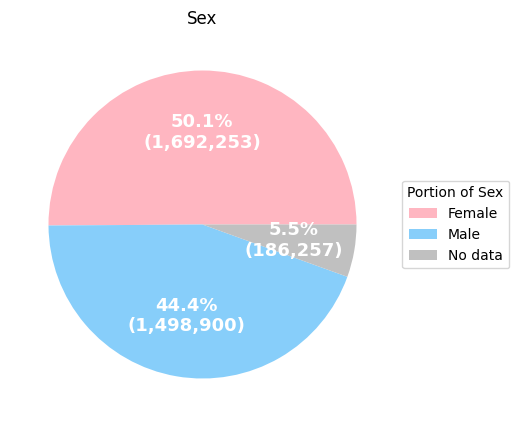

In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:,.1f}%\n({:,d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(df.groupby("sex").sex.count(), autopct=lambda pct: func(pct, df.groupby("sex").sex.count()),
                                  textprops=dict(color="w"),colors=['lightpink','lightskyblue','silver'])

ax.legend(wedges, df.sex.unique(),
          title="Portion of Sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=13, weight="bold")
ax.set_title("Sex")
plt.show()

In [31]:
df.groupby('sex').age.agg(['count', 'mean' ,'min', 'max'])

,count,mean,min,max
sex,,,,
Female,1603284,36.246890,0.083333,119.0
Male,1401449,34.274005,0.083333,119.0
No data,101309,37.201739,0.083333,104.0


In [32]:
agebXsex = pd.pivot_table(df[~df.sex.isin(["No data"])],
  values=['CountCase'],index=['age_bin','sex'],aggfunc={'CountCase':'sum'})
add = []
for k,v in agebXsex.iterrows():
  add.append(k[0])
agebXsex['Age_bin'] = add
add2 = []
for k,v in agebXsex.iterrows():
  add2.append(k[1])
agebXsex['Sex'] = add2
agebXsex.style.background_gradient(cmap = 'GnBu')

In [33]:
se = pd.pivot_table(df[df.sex.isin(['Female','Male'])],values=['CountCase'],index=['age_bin'],columns=['sex'],aggfunc='sum')
se


CountCase        
sex        Female    Male
age_bin                  
1-10       131800  142026
11-20      163652  165762
21-30      365877  322044
31-40      320005  280977
41-50      252981  211167
51-60      187804  143651
61-70      104448   78341
71-80       46516   35087
81-90       19476   12654
91-100       3035    1544
<1           7573    8156
>100          117      40
No data     88969   97451

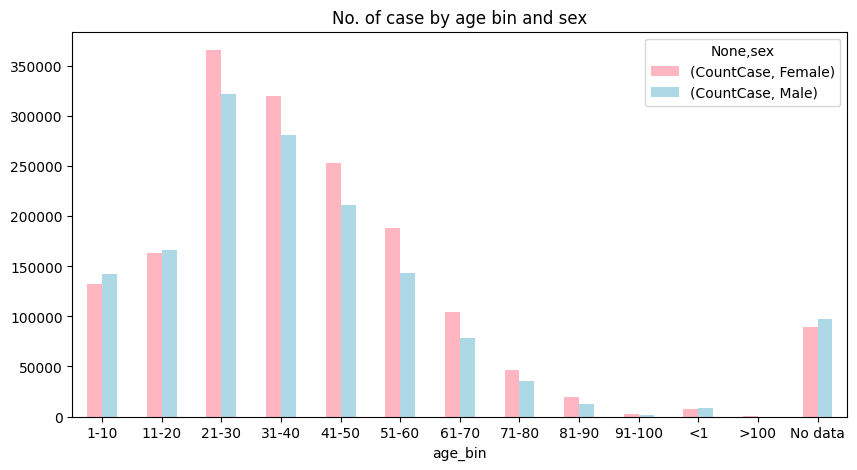

In [34]:
se.plot(kind='bar',figsize=(10,5),rot=0,title='No. of case by age bin and sex',color = ['lightpink','lightblue'])

In [35]:
import plotly.express as px
fig = px.sunburst(agebXsex, path=['Sex', 'Age_bin'], values='CountCase',title = 'Gender vs Age bin')

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)

fig.show()

### **Diff Date Insight:** หลังจากกระทรวงได้รับแจ้งยอดผู้ป่วยโควิด ก็จะรายงานในวันถัดไปทันที

จำนวนข้อมูล วันที่แถลงข่าว ก่อนจะได้รับรายงาน = 50 เคส คิดเป็น 0.00%


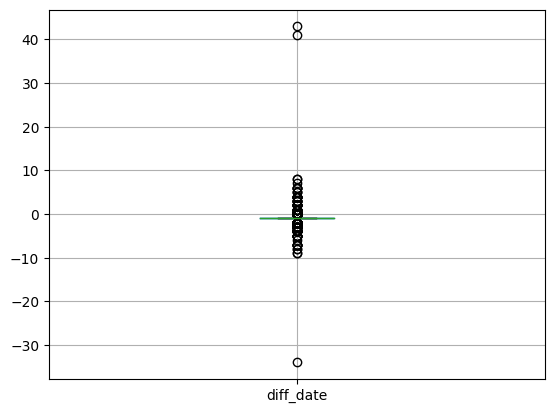

In [36]:
#diff_date
df.boxplot(column=['diff_date'])
annouce_before = df[df.diff_date>0].shape[0]
print(f'จำนวนข้อมูล วันที่แถลงข่าว ก่อนจะได้รับรายงาน = {annouce_before:,d} เคส คิดเป็น {annouce_before*100/df.shape[0]:.2f}%' )

In [37]:
difff = pd.pivot_table(df,values='CountCase',index='diff_date_bin',aggfunc='sum')
difff['% of total'] = (difff['CountCase']/difff['CountCase'].sum())*100
add = []
for k,v in difff.iterrows():
  add.append(k)
difff['Diff_date_bin'] = add
difff.sort_values('CountCase', inplace=True, ascending=False)

difff

,CountCase,% of total,Diff_date_bin
diff_date_bin,,,
Next day,3373036,99.870492,Next day
No data,2795,0.082756,No data
2-10d,1334,0.039498,2-10d
within1d,194,0.005744,within1d
>0,50,0.001480,>0
>10d,1,0.000030,>10d


In [38]:
import plotly.express as px
fig = px.sunburst(difff, path=['Diff_date_bin'], values='CountCase',title = 'Diff Date')

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)

fig.show()

In [39]:
import plotly.graph_objects as go
print('\t\t\t\tAge bin (%portion of total)')
fig = go.Figure(go.Bar(
            x=[x for x in difff.loc[:,"% of total"]],
            y=[k for k,v in difff.iterrows()],
            orientation='h'))

fig.update_layout(
    autosize=False,
    width=400,
    height=300,
    margin=dict(
        l=20,
        r=20,
        b=10,
        t=10,
        pad=4
    )
)
fig.show()
print('\t\t\t\t\t% of total')

				Age bin (%portion of total)


					% of total


### **Risk type Insight:** 42% สาเหตุความเสี่ยง เกิดจากการสัมผัสผู้ติดเชื้อ

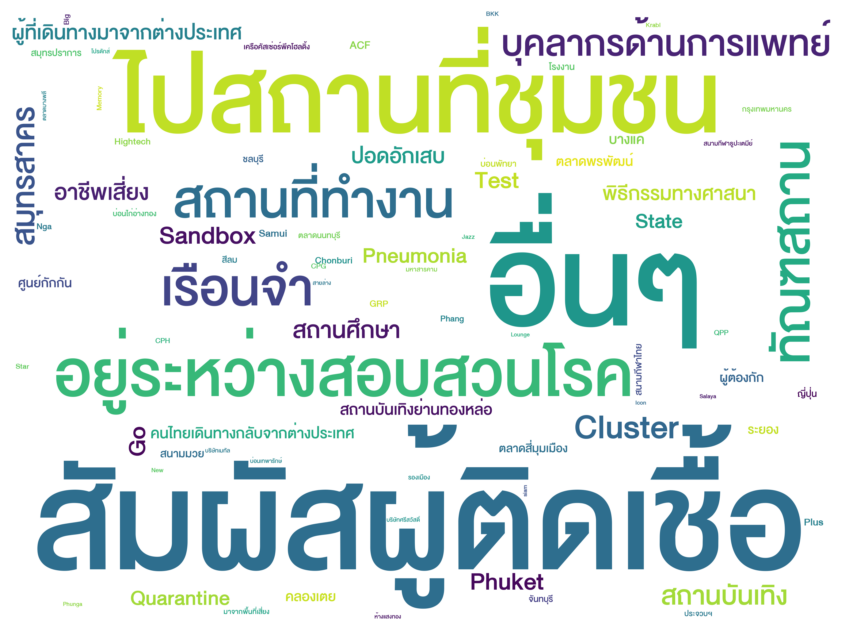

In [40]:
from PIL import Image
from wordcloud import WordCloud
regexp = r"[ก-๙a-zA-Z']+"
path = '/content/drive/My Drive/Covid_Analysis/DB.TTF'
wordCloud = WordCloud(
    font_path=path,relative_scaling = 0.3,width=1024,height=768,max_words=2000,
    min_font_size=10,scale=3,font_step=4,collocations=False,
    background_color='white',regexp=regexp
    ).generate(' '.join(df.risk))
plt.figure(figsize = (20,8))
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear')
plt.show()
#min_font_size=5,

In [41]:
TopRisk = pd.pivot_table(df,values=['CountCase'],index=['risk'],aggfunc='sum')
TopRisk['% of Total'] = TopRisk['CountCase']/TopRisk['CountCase'].sum()*100

add = []
for k,v in TopRisk.iterrows():
  add.append(k)
TopRisk['Risk'] = add

#TopRisk.style.background_gradient(cmap = 'coolwarm')
TopRisk[~TopRisk.Risk.isin(["อื่นๆ","อยู่ระหว่างสอบสวนโรค"])].sort_values(by = 'CountCase', ascending = False).head(10).style.background_gradient(cmap = 'GnBu')

,CountCase,% of Total,Risk
risk,,,
สัมผัสผู้ติดเชื้อ,1419789,42.037804,สัมผัสผู้ติดเชื้อ
ไปสถานที่ชุมชน,335394,9.930509,ไปสถานที่ชุมชน
สถานที่ทำงาน,93466,2.767387,สถานที่ทำงาน
ทัณฑสถาน/เรือนจำ,93388,2.765077,ทัณฑสถาน/เรือนจำ
บุคลากรด้านการแพทย์,30214,0.894591,บุคลากรด้านการแพทย์
Cluster สมุทรสาคร,17900,0.529992,Cluster สมุทรสาคร
สถานบันเทิง,8953,0.265085,สถานบันเทิง
Phuket Sandbox,6474,0.191685,Phuket Sandbox
Test and Go,6021,0.178273,Test and Go


In [42]:
riskTop9 = ['สัมผัสผู้ติดเชื้อ','ไปสถานที่ชุมชน','ทัณฑสถาน/เรือนจำ','สถานที่ทำงาน','บุคลากรด้านการแพทย์','Cluster สมุทรสาคร','สถานบันเทิง','Phuket Sandbox','สถานศึกษา']

In [43]:
risk9 = pd.pivot_table(df[df.risk.isin(riskTop9)],values=['CountCase'],index=['risk','announce_date'],aggfunc='sum')

add = []
for k,v in risk9.iterrows():
  add.append(k[0])
risk9['Risk'] = add

add2 = []
for k,v in risk9.iterrows():
  add2.append(k[1])
risk9['Announce_date'] = add2


risk9

CountCase               Risk Announce_date
risk              announce_date                                            
Cluster สมุทรสาคร 2020-12-18             1  Cluster สมุทรสาคร    2020-12-18
                  2020-12-19            12  Cluster สมุทรสาคร    2020-12-19
                  2020-12-20           535  Cluster สมุทรสาคร    2020-12-20
                  2020-12-21           372  Cluster สมุทรสาคร    2020-12-21
                  2020-12-22           413  Cluster สมุทรสาคร    2020-12-22
...                                    ...                ...           ...
ไปสถานที่ชุมชน    2022-03-17           897     ไปสถานที่ชุมชน    2022-03-17
                  2022-03-18           823     ไปสถานที่ชุมชน    2022-03-18
                  2022-03-19           648     ไปสถานที่ชุมชน    2022-03-19
                  2022-03-20           567     ไปสถานที่ชุมชน    2022-03-20
                  2022-03-21           557     ไปสถานที่ชุมชน    2022-03-21

[2694 rows x 3 columns]

In [44]:
import plotly.express as px

fig = px.line(risk9, x="Announce_date", y="CountCase", color='Risk',title='No. of case by Top 9 Risk type ')

fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ))
fig.show()

In [45]:
hi = pd.pivot_table(risk9,index=['announce_date'],columns='risk')
add2 = []
for k,v in hi.iterrows():
  add2.append(k)
hi['Announce_date'] = add2
hi

CountCase                                  \
risk          Cluster สมุทรสาคร Phuket Sandbox ทัณฑสถาน/เรือนจำ   
announce_date                                                     
2020-01-28                  NaN            NaN              NaN   
2020-02-08                  NaN            NaN              NaN   
2020-02-11                  NaN            NaN              NaN   
2020-02-15                  NaN            NaN              NaN   
2020-02-17                  NaN            NaN              NaN   
...                         ...            ...              ...   
2022-03-17                  NaN           11.0             54.0   
2022-03-18                  NaN            4.0            103.0   
2022-03-19                  NaN            NaN             57.0   
2022-03-20                  NaN            1.0            173.0   
2022-03-21                  NaN            1.0             46.0   

                                                                      \
risk          บุคลากรด้านการแพทย์ สถานที่ทำงาน สถานบันเทิง สถานศึกษา   
announce_date                                                          
2020-01-28                    NaN          NaN         NaN       NaN   
2020-02-08                    NaN          NaN         NaN       NaN   
2020-02-11                    NaN          NaN         NaN       NaN   
2020-02-15                    1.0          NaN         NaN       NaN   
2020-02-17                    NaN          NaN         NaN       NaN   
...                           ...          ...         ...       ...   
2022-03-17                  610.0        452.0         1.0      96.0   
2022-03-18                  405.0        627.0         2.0      92.0   
2022-03-19                  501.0        409.0         1.0     128.0   
2022-03-20                  432.0        673.0         3.0      48.0   
2022-03-21                  329.0        609.0         3.0      12.0   

                                               Announce_date  
risk          สัมผัสผู้ติดเชื้อ ไปสถานที่ชุมชน                
announce_date                                                 
2020-01-28                  3.0            NaN    2020-01-28  
2020-02-08                  4.0            NaN    2020-02-08  
2020-02-11                  1.0            NaN    2020-02-11  
2020-02-15                  NaN            NaN    2020-02-15  
2020-02-17                  1.0            NaN    2020-02-17  
...                         ...            ...           ...  
2022-03-17               8655.0          897.0    2022-03-17  
2022-03-18               9804.0          823.0    2022-03-18  
2022-03-19               8486.0          648.0    2022-03-19  
2022-03-20               9667.0          567.0    2022-03-20  
2022-03-21               7855.0          557.0    2022-03-21  

[542 rows x 10 columns]

In [46]:
hi.columns

MultiIndex([(    'CountCase',   'Cluster สมุทรสาคร'),
            (    'CountCase',      'Phuket Sandbox'),
            (    'CountCase',    'ทัณฑสถาน/เรือนจำ'),
            (    'CountCase', 'บุคลากรด้านการแพทย์'),
            (    'CountCase',        'สถานที่ทำงาน'),
            (    'CountCase',         'สถานบันเทิง'),
            (    'CountCase',           'สถานศึกษา'),
            (    'CountCase',   'สัมผัสผู้ติดเชื้อ'),
            (    'CountCase',      'ไปสถานที่ชุมชน'),
            ('Announce_date',                    '')],
           names=[None, 'risk'])

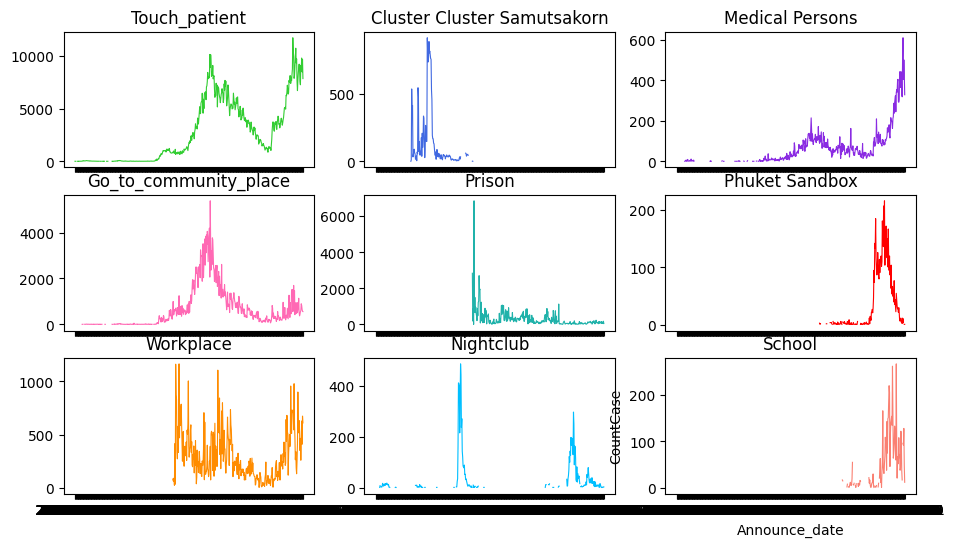

In [47]:
import pandas as pd
import matplotlib.pyplot as plt  

monthList  = hi['Announce_date'].tolist()
#bathingsoap   = risk9[risk9.Risk=='Cluster สมุทรสาคร'].tolist()
Cluster_สมุทรสาคร   = hi[(    'CountCase',   'Cluster สมุทรสาคร')].tolist()
#faceWashSalesData   = risk9['facewash'].tolist()
Phuket_Sandbox = hi['CountCase',      'Phuket Sandbox'].tolist()
Prison = hi['CountCase',    'ทัณฑสถาน/เรือนจำ'].tolist()
Medical_Persons = hi['CountCase', 'บุคลากรด้านการแพทย์'].tolist()
Workplace = hi['CountCase',        'สถานที่ทำงาน'].tolist()
Nightclub = hi['CountCase',         'สถานบันเทิง'].tolist()
School = hi['CountCase',           'สถานศึกษา'].tolist()
Touch_patient = hi['CountCase',   'สัมผัสผู้ติดเชื้อ'].tolist()
Go_to_community_place = hi['CountCase',      'ไปสถานที่ชุมชน'].tolist()

f, axarr = plt.subplots(3,3, sharex=True,figsize=(11,6))
axarr[0][1].plot(monthList, Cluster_สมุทรสาคร, label = 'Cluster Samutsakorn', color='royalblue', linewidth=0.8)
axarr[0][1].set_title('Cluster Cluster Samutsakorn')
axarr[1][2].plot(monthList,Phuket_Sandbox, label = 'Phuket Sandbox', color='red',linewidth=0.8)
axarr[1][2].set_title('Phuket Sandbox')
axarr[1][1].plot(monthList,Prison, label = 'Prison', color='lightseagreen',linewidth=0.8)
axarr[1][1].set_title('Prison')
axarr[0][2].plot(monthList,Medical_Persons, label = 'Medical Persons', color='blueviolet',linewidth=0.8)
axarr[0][2].set_title('Medical Persons')
axarr[2][0].plot(monthList,Workplace, label = 'Workplace', color='darkorange',linewidth=0.8)
axarr[2][0].set_title('Workplace')
axarr[2][1].plot(monthList,Nightclub, label = 'Nightclub', color='deepskyblue',linewidth=0.8)
axarr[2][1].set_title('Nightclub')
axarr[2][2].plot(monthList,School, label = 'School', color='salmon',linewidth=0.8)
axarr[2][2].set_title('School')
axarr[0][0].plot(monthList,Touch_patient, label = 'Touch_patient', color='limegreen',linewidth=0.8)
axarr[0][0].set_title('Touch_patient')
axarr[1][0].plot(monthList,Go_to_community_place, label = 'Go_to_community_place', color='hotpink',linewidth=0.8)
axarr[1][0].set_title('Go_to_community_place')


plt.xticks(monthList)
plt.xlabel('Announce_date')
plt.ylabel('CountCase')
plt.show()

In [48]:
ageXrisk = pd.pivot_table(df,values=['CountCase','age'],index=['risk'],aggfunc={'CountCase':'sum','age':'mean' })


add = []
for k,v in ageXrisk.iterrows():
  add.append(k)
ageXrisk['Risk'] = add


ageXrisk.rename(columns={'age' : 'age mean'}, inplace = True)

ageXrisk[ageXrisk.CountCase	>10000].sort_values('age mean', ascending = False)

,CountCase,age mean,Risk
risk,,,
บุคลากรด้านการแพทย์,30214,36.843061,บุคลากรด้านการแพทย์
อื่นๆ,1029927,36.779551,อื่นๆ
ทัณฑสถาน/เรือนจำ,93388,36.037271,ทัณฑสถาน/เรือนจำ
อยู่ระหว่างสอบสวนโรค,302339,35.907326,อยู่ระหว่างสอบสวนโรค
ไปสถานที่ชุมชน,335394,35.438697,ไปสถานที่ชุมชน
สัมผัสผู้ติดเชื้อ,1419789,34.477533,สัมผัสผู้ติดเชื้อ
สถานที่ทำงาน,93466,34.262381,สถานที่ทำงาน
Cluster สมุทรสาคร,17900,32.499835,Cluster สมุทรสาคร


In [49]:
import plotly.express as px
fig = px.scatter(ageXrisk[~ageXrisk.Risk.isin(["อื่นๆ","อยู่ระหว่างสอบสวนโรค"])].query("CountCase>1000"), x="CountCase", y="age mean",
	         size="CountCase", color="Risk",
                 hover_name="Risk", log_x=True, size_max=120,title= 'No. of case (>1k cases) VS Average Age by Risk type')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(l=50,r=50,b=100,t=100,pad=4
    ))
fig.show()

In [50]:
#province_of_onset
prov = pd.pivot_table(df[~df.province_of_onset.isin(["No data"])],values='CountCase',index='province_of_onset',aggfunc='sum')
prov['% of total'] = (prov['CountCase']/prov['CountCase'].sum())*100
prov.sort_values('CountCase', inplace=True, ascending=False)
prov = prov.head(10)

p10 = []
for k,v in prov.iterrows():
  p10.append(k)


In [51]:
p10

['กรุงเทพมหานคร',
 'สมุทรปราการ',
 'ชลบุรี',
 'สมุทรสาคร',
 'นนทบุรี',
 'ปทุมธานี',
 'สงขลา',
 'ระยอง',
 'นครปฐม',
 'นครศรีธรรมราช']

In [52]:
p10
#province_of_onset
provincc = pd.pivot_table(df[df.province_of_onset.isin(p10)],values='CountCase',index=['province_of_onset','announce_date','day'],aggfunc='sum')

add = []
for k,v in provincc.iterrows():
  add.append(k[0])
provincc['province'] = add

add2 = []
for k,v in provincc.iterrows():
  add2.append(k[1])
provincc['Announce_date'] = add2

add3 = []
for k,v in provincc.iterrows():
  add3.append(k[2])
provincc['Day'] = add3

provincc 

CountCase       province Announce_date  \
province_of_onset announce_date day                                           
กรุงเทพมหานคร     2020-01-12    12           1  กรุงเทพมหานคร    2020-01-12   
                  2020-01-17    17           1  กรุงเทพมหานคร    2020-01-17   
                  2020-01-22    22           1  กรุงเทพมหานคร    2020-01-22   
                  2020-01-24    24           1  กรุงเทพมหานคร    2020-01-24   
                  2020-01-25    25           1  กรุงเทพมหานคร    2020-01-25   
...                                        ...            ...           ...   
สมุทรสาคร         2022-03-17    17         808      สมุทรสาคร    2022-03-17   
                  2022-03-18    18         657      สมุทรสาคร    2022-03-18   
                  2022-03-19    19         588      สมุทรสาคร    2022-03-19   
                  2022-03-20    20         659      สมุทรสาคร    2022-03-20   
                  2022-03-21    21         594      สมุทรสาคร    2022-03-21   

                                     Day  
province_of_onset announce_date day       
กรุงเทพมหานคร     2020-01-12    12    12  
                  2020-01-17    17    17  
                  2020-01-22    22    22  
                  2020-01-24    24    24  
                  2020-01-25    25    25  
...                                  ...  
สมุทรสาคร         2022-03-17    17    17  
                  2022-03-18    18    18  
                  2022-03-19    19    19  
                  2022-03-20    20    20  
                  2022-03-21    21    21  

[4773 rows x 4 columns]

In [53]:
fig = px.bar(provincc[~provincc.Day.isin([0])], x="Announce_date", y="CountCase", color="province")
fig.show()

In [54]:
import plotly.express as px

fig = px.line(provincc[~provincc.Day.isin([0])], x="Announce_date", y="CountCase", color='province',title='No. of case by Top 10 provinces')

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ))
fig.show()

In [55]:
tt = pd.pivot_table(df,values=['CountCase','age'],index=['province_of_onset',"Region"],aggfunc={'CountCase':'sum','age':'mean' })
add = []; add2 = []
for k,v in tt.iterrows():
  add.append(k[0])
tt['province'] = add
for k,v in tt.iterrows():
  add2.append(k[1])
tt['region'] = add2

tt.rename(columns={'age' : 'age mean'}, inplace = True)
#tt.style.background_gradient(cmap = 'coolwarm')
tt[~tt.province.isin(["No data"])].sort_values(by = 'CountCase', ascending = False).head(10).style.background_gradient(cmap = 'YlGnBu')


,,CountCase,age mean,province,region
province_of_onset,Region,,,,
กรุงเทพมหานคร,Central,573827,37.283727,กรุงเทพมหานคร,Central
สมุทรปราการ,Central,186872,35.900331,สมุทรปราการ,Central
ชลบุรี,East,177281,34.128152,ชลบุรี,East
สมุทรสาคร,Central,122259,35.600319,สมุทรสาคร,Central
นนทบุรี,Central,119029,36.225383,นนทบุรี,Central
ปทุมธานี,Central,86928,35.411680,ปทุมธานี,Central
สงขลา,South,79719,34.086008,สงขลา,South
ระยอง,East,76882,33.438874,ระยอง,East
นครปฐม,Central,71308,36.192064,นครปฐม,Central


In [56]:
import plotly.express as px
fig = px.scatter(tt[~tt.region.isin(["No data"])], x="CountCase", y="age mean",
	         size="CountCase", color="region",
                 hover_name="province", log_x=True, log_y=True,size_max=100,title= 'No. of case VS Average Age by province')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(l=50,r=50,b=100,t=100,pad=4))
fig.show()

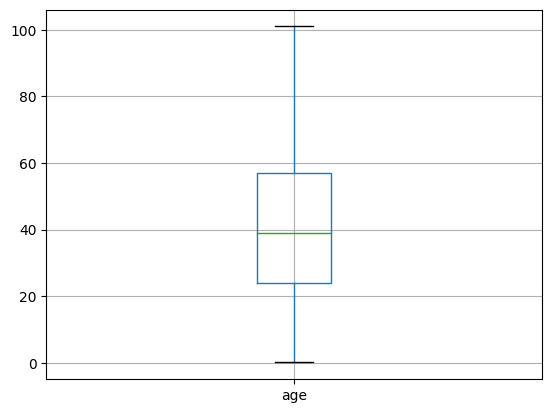

In [57]:
df[df.province_of_onset	=='สตูล'].boxplot(column=['age'])

In [58]:
df[df.province_of_onset	=='สตูล'].age.describe()

count    14961.000000
mean        40.119948
std         22.324526
min          0.083333
25%         24.000000
50%         39.000000
75%         57.000000
max        101.000000
Name: age, dtype: float64

In [59]:
Lot3=[{"txn_date":"2021-04-01","new_case":26,"total_case":28889,"new_case_excludeabroad":21,"total_case_excludeabroad":25787,"new_death":0,"total_death":94,"new_recovered":122,"total_recovered":27548,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-02","new_case":58,"total_case":28947,"new_case_excludeabroad":45,"total_case_excludeabroad":25832,"new_death":0,"total_death":94,"new_recovered":58,"total_recovered":27606,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-03","new_case":84,"total_case":29031,"new_case_excludeabroad":69,"total_case_excludeabroad":25901,"new_death":1,"total_death":95,"new_recovered":62,"total_recovered":27668,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-04","new_case":96,"total_case":29127,"new_case_excludeabroad":87,"total_case_excludeabroad":25988,"new_death":0,"total_death":95,"new_recovered":106,"total_recovered":27774,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-05","new_case":194,"total_case":29321,"new_case_excludeabroad":182,"total_case_excludeabroad":26170,"new_death":0,"total_death":95,"new_recovered":66,"total_recovered":27840,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-06","new_case":250,"total_case":29571,"new_case_excludeabroad":245,"total_case_excludeabroad":26415,"new_death":0,"total_death":95,"new_recovered":108,"total_recovered":27948,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-07","new_case":334,"total_case":29905,"new_case_excludeabroad":327,"total_case_excludeabroad":26742,"new_death":0,"total_death":95,"new_recovered":121,"total_recovered":28069,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-08","new_case":405,"total_case":30310,"new_case_excludeabroad":391,"total_case_excludeabroad":27133,"new_death":0,"total_death":95,"new_recovered":32,"total_recovered":28101,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-09","new_case":559,"total_case":30869,"new_case_excludeabroad":549,"total_case_excludeabroad":27682,"new_death":1,"total_death":96,"new_recovered":27,"total_recovered":28128,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-10","new_case":789,"total_case":31658,"new_case_excludeabroad":781,"total_case_excludeabroad":28463,"new_death":1,"total_death":97,"new_recovered":33,"total_recovered":28161,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-11","new_case":967,"total_case":32625,"new_case_excludeabroad":964,"total_case_excludeabroad":29427,"new_death":0,"total_death":97,"new_recovered":53,"total_recovered":28214,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-12","new_case":985,"total_case":33610,"new_case_excludeabroad":980,"total_case_excludeabroad":30407,"new_death":0,"total_death":97,"new_recovered":34,"total_recovered":28248,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-13","new_case":965,"total_case":34575,"new_case_excludeabroad":956,"total_case_excludeabroad":31363,"new_death":0,"total_death":97,"new_recovered":40,"total_recovered":28288,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-14","new_case":1338,"total_case":35913,"new_case_excludeabroad":1330,"total_case_excludeabroad":32693,"new_death":0,"total_death":97,"new_recovered":34,"total_recovered":28322,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-15","new_case":1543,"total_case":37456,"new_case_excludeabroad":1540,"total_case_excludeabroad":34233,"new_death":0,"total_death":97,"new_recovered":61,"total_recovered":28383,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-16","new_case":1582,"total_case":39038,"new_case_excludeabroad":1576,"total_case_excludeabroad":35809,"new_death":3,"total_death":100,"new_recovered":97,"total_recovered":28480,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-17","new_case":1547,"total_case":40585,"new_case_excludeabroad":1544,"total_case_excludeabroad":37353,"new_death":0,"total_death":100,"new_recovered":90,"total_recovered":28570,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-18","new_case":1767,"total_case":42352,"new_case_excludeabroad":1765,"total_case_excludeabroad":39118,"new_death":1,"total_death":101,"new_recovered":113,"total_recovered":28683,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-19","new_case":1390,"total_case":43742,"new_case_excludeabroad":1386,"total_case_excludeabroad":40504,"new_death":3,"total_death":104,"new_recovered":104,"total_recovered":28787,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-20","new_case":1443,"total_case":45185,"new_case_excludeabroad":1441,"total_case_excludeabroad":41945,"new_death":4,"total_death":108,"new_recovered":171,"total_recovered":28958,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-21","new_case":1458,"total_case":46643,"new_case_excludeabroad":1454,"total_case_excludeabroad":43399,"new_death":2,"total_death":110,"new_recovered":413,"total_recovered":29371,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-22","new_case":1470,"total_case":48113,"new_case_excludeabroad":1470,"total_case_excludeabroad":44869,"new_death":7,"total_death":117,"new_recovered":477,"total_recovered":29848,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-23","new_case":2070,"total_case":50183,"new_case_excludeabroad":2062,"total_case_excludeabroad":46931,"new_death":4,"total_death":121,"new_recovered":341,"total_recovered":30189,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-24","new_case":2839,"total_case":53022,"new_case_excludeabroad":2827,"total_case_excludeabroad":49758,"new_death":8,"total_death":129,"new_recovered":377,"total_recovered":30566,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-25","new_case":2438,"total_case":55460,"new_case_excludeabroad":2433,"total_case_excludeabroad":52191,"new_death":11,"total_death":140,"new_recovered":547,"total_recovered":31113,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-26","new_case":2048,"total_case":57508,"new_case_excludeabroad":2037,"total_case_excludeabroad":54228,"new_death":8,"total_death":148,"new_recovered":480,"total_recovered":31593,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-27","new_case":2179,"total_case":59687,"new_case_excludeabroad":2174,"total_case_excludeabroad":56402,"new_death":15,"total_death":163,"new_recovered":1958,"total_recovered":33551,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-28","new_case":2012,"total_case":61699,"new_case_excludeabroad":2001,"total_case_excludeabroad":58403,"new_death":15,"total_death":178,"new_recovered":851,"total_recovered":34402,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-29","new_case":1871,"total_case":63570,"new_case_excludeabroad":1864,"total_case_excludeabroad":60267,"new_death":10,"total_death":188,"new_recovered":992,"total_recovered":35394,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-04-30","new_case":1583,"total_case":65153,"new_case_excludeabroad":1579,"total_case_excludeabroad":61846,"new_death":15,"total_death":203,"new_recovered":860,"total_recovered":36254,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-01","new_case":1891,"total_case":67044,"new_case_excludeabroad":1884,"total_case_excludeabroad":63730,"new_death":21,"total_death":224,"new_recovered":1821,"total_recovered":38075,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-02","new_case":1940,"total_case":68984,"new_case_excludeabroad":1930,"total_case_excludeabroad":65660,"new_death":21,"total_death":245,"new_recovered":1183,"total_recovered":39258,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-03","new_case":2041,"total_case":71025,"new_case_excludeabroad":2040,"total_case_excludeabroad":67700,"new_death":31,"total_death":276,"new_recovered":1726,"total_recovered":40984,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-04","new_case":1763,"total_case":72788,"new_case_excludeabroad":1750,"total_case_excludeabroad":69450,"new_death":27,"total_death":303,"new_recovered":1490,"total_recovered":42474,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-05","new_case":2112,"total_case":74900,"new_case_excludeabroad":2107,"total_case_excludeabroad":71557,"new_death":15,"total_death":318,"new_recovered":1886,"total_recovered":44360,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-06","new_case":1911,"total_case":76811,"new_case_excludeabroad":1902,"total_case_excludeabroad":73459,"new_death":18,"total_death":336,"new_recovered":2435,"total_recovered":46795,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-07","new_case":2044,"total_case":78855,"new_case_excludeabroad":2040,"total_case_excludeabroad":75499,"new_death":27,"total_death":363,"new_recovered":2377,"total_recovered":49172,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-08","new_case":2419,"total_case":81274,"new_case_excludeabroad":2409,"total_case_excludeabroad":77908,"new_death":19,"total_death":382,"new_recovered":2247,"total_recovered":51419,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-09","new_case":2101,"total_case":83375,"new_case_excludeabroad":2086,"total_case_excludeabroad":79994,"new_death":17,"total_death":399,"new_recovered":2186,"total_recovered":53605,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-10","new_case":1630,"total_case":85005,"new_case_excludeabroad":1622,"total_case_excludeabroad":81616,"new_death":22,"total_death":421,"new_recovered":1603,"total_recovered":55208,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-11","new_case":1919,"total_case":86924,"new_case_excludeabroad":1902,"total_case_excludeabroad":83518,"new_death":31,"total_death":452,"new_recovered":1829,"total_recovered":57037,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-12","new_case":1983,"total_case":88907,"new_case_excludeabroad":1974,"total_case_excludeabroad":85492,"new_death":34,"total_death":486,"new_recovered":2006,"total_recovered":59043,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-13","new_case":4887,"total_case":93794,"new_case_excludeabroad":4871,"total_case_excludeabroad":90363,"new_death":32,"total_death":518,"new_recovered":1572,"total_recovered":60615,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-14","new_case":2256,"total_case":96050,"new_case_excludeabroad":2251,"total_case_excludeabroad":92614,"new_death":30,"total_death":548,"new_recovered":1701,"total_recovered":62316,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-15","new_case":3095,"total_case":99145,"new_case_excludeabroad":3092,"total_case_excludeabroad":95706,"new_death":17,"total_death":565,"new_recovered":1351,"total_recovered":63667,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-16","new_case":2302,"total_case":101447,"new_case_excludeabroad":2279,"total_case_excludeabroad":97985,"new_death":24,"total_death":589,"new_recovered":2136,"total_recovered":65803,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-17","new_case":9635,"total_case":111082,"new_case_excludeabroad":9626,"total_case_excludeabroad":107611,"new_death":25,"total_death":614,"new_recovered":1397,"total_recovered":67200,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-18","new_case":2473,"total_case":113555,"new_case_excludeabroad":2450,"total_case_excludeabroad":110061,"new_death":35,"total_death":649,"new_recovered":2718,"total_recovered":69918,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-19","new_case":3394,"total_case":116949,"new_case_excludeabroad":3377,"total_case_excludeabroad":113438,"new_death":29,"total_death":678,"new_recovered":4450,"total_recovered":74368,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-20","new_case":2636,"total_case":119585,"new_case_excludeabroad":2578,"total_case_excludeabroad":116016,"new_death":25,"total_death":703,"new_recovered":2268,"total_recovered":76636,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-21","new_case":3481,"total_case":123066,"new_case_excludeabroad":3469,"total_case_excludeabroad":119485,"new_death":32,"total_death":735,"new_recovered":2868,"total_recovered":79504,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-22","new_case":3052,"total_case":126118,"new_case_excludeabroad":3011,"total_case_excludeabroad":122496,"new_death":24,"total_death":759,"new_recovered":2900,"total_recovered":82404,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-23","new_case":3382,"total_case":129500,"new_case_excludeabroad":3377,"total_case_excludeabroad":125873,"new_death":17,"total_death":776,"new_recovered":2131,"total_recovered":84535,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-24","new_case":2713,"total_case":132213,"new_case_excludeabroad":2664,"total_case_excludeabroad":128537,"new_death":30,"total_death":806,"new_recovered":1565,"total_recovered":86100,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-25","new_case":3226,"total_case":135439,"new_case_excludeabroad":3207,"total_case_excludeabroad":131744,"new_death":26,"total_death":832,"new_recovered":3094,"total_recovered":89194,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-26","new_case":2455,"total_case":137894,"new_case_excludeabroad":2439,"total_case_excludeabroad":134183,"new_death":41,"total_death":873,"new_recovered":2571,"total_recovered":91765,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-27","new_case":3323,"total_case":141217,"new_case_excludeabroad":3302,"total_case_excludeabroad":137485,"new_death":47,"total_death":920,"new_recovered":2063,"total_recovered":93828,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-28","new_case":3759,"total_case":144976,"new_case_excludeabroad":3741,"total_case_excludeabroad":141226,"new_death":34,"total_death":954,"new_recovered":4044,"total_recovered":97872,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-29","new_case":4803,"total_case":149779,"new_case_excludeabroad":4752,"total_case_excludeabroad":145978,"new_death":34,"total_death":988,"new_recovered":4439,"total_recovered":102311,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-30","new_case":4528,"total_case":154307,"new_case_excludeabroad":4501,"total_case_excludeabroad":150479,"new_death":24,"total_death":1012,"new_recovered":2933,"total_recovered":105244,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-05-31","new_case":5485,"total_case":159792,"new_case_excludeabroad":5428,"total_case_excludeabroad":155907,"new_death":19,"total_death":1031,"new_recovered":3101,"total_recovered":108345,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-01","new_case":2230,"total_case":162022,"new_case_excludeabroad":2209,"total_case_excludeabroad":158116,"new_death":38,"total_death":1069,"new_recovered":3390,"total_recovered":111735,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-02","new_case":3440,"total_case":165462,"new_case_excludeabroad":3425,"total_case_excludeabroad":161541,"new_death":38,"total_death":1107,"new_recovered":2843,"total_recovered":114578,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-03","new_case":3886,"total_case":169348,"new_case_excludeabroad":3837,"total_case_excludeabroad":165378,"new_death":39,"total_death":1146,"new_recovered":3626,"total_recovered":118204,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-04","new_case":2631,"total_case":171979,"new_case_excludeabroad":2580,"total_case_excludeabroad":167958,"new_death":31,"total_death":1177,"new_recovered":2493,"total_recovered":120697,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-05","new_case":2817,"total_case":174796,"new_case_excludeabroad":2761,"total_case_excludeabroad":170719,"new_death":36,"total_death":1213,"new_recovered":3396,"total_recovered":124093,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-06","new_case":2671,"total_case":177467,"new_case_excludeabroad":2588,"total_case_excludeabroad":173307,"new_death":23,"total_death":1236,"new_recovered":2424,"total_recovered":126517,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-07","new_case":2419,"total_case":179886,"new_case_excludeabroad":2387,"total_case_excludeabroad":175694,"new_death":33,"total_death":1269,"new_recovered":2999,"total_recovered":129516,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-08","new_case":2662,"total_case":182548,"new_case_excludeabroad":2646,"total_case_excludeabroad":178340,"new_death":29,"total_death":1298,"new_recovered":2483,"total_recovered":131999,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-09","new_case":2680,"total_case":185228,"new_case_excludeabroad":2669,"total_case_excludeabroad":181009,"new_death":34,"total_death":1332,"new_recovered":4253,"total_recovered":136252,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-10","new_case":2310,"total_case":187538,"new_case_excludeabroad":2272,"total_case_excludeabroad":183281,"new_death":43,"total_death":1375,"new_recovered":3035,"total_recovered":139287,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-11","new_case":2290,"total_case":189828,"new_case_excludeabroad":2260,"total_case_excludeabroad":185541,"new_death":27,"total_death":1402,"new_recovered":5711,"total_recovered":144998,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-12","new_case":3277,"total_case":193105,"new_case_excludeabroad":3248,"total_case_excludeabroad":188789,"new_death":29,"total_death":1431,"new_recovered":5273,"total_recovered":150271,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-13","new_case":2804,"total_case":195909,"new_case_excludeabroad":2743,"total_case_excludeabroad":191532,"new_death":18,"total_death":1449,"new_recovered":4143,"total_recovered":154414,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-14","new_case":3355,"total_case":199264,"new_case_excludeabroad":3345,"total_case_excludeabroad":194877,"new_death":17,"total_death":1466,"new_recovered":3530,"total_recovered":157944,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-15","new_case":3000,"total_case":202264,"new_case_excludeabroad":2995,"total_case_excludeabroad":197872,"new_death":19,"total_death":1485,"new_recovered":4774,"total_recovered":162718,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-16","new_case":2331,"total_case":204595,"new_case_excludeabroad":2302,"total_case_excludeabroad":200174,"new_death":40,"total_death":1525,"new_recovered":4947,"total_recovered":167665,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-17","new_case":3129,"total_case":207724,"new_case_excludeabroad":3106,"total_case_excludeabroad":203280,"new_death":30,"total_death":1555,"new_recovered":4651,"total_recovered":172316,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-18","new_case":3058,"total_case":210782,"new_case_excludeabroad":3039,"total_case_excludeabroad":206319,"new_death":22,"total_death":1577,"new_recovered":4094,"total_recovered":176410,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-19","new_case":3667,"total_case":214449,"new_case_excludeabroad":3635,"total_case_excludeabroad":209954,"new_death":32,"total_death":1609,"new_recovered":4948,"total_recovered":181358,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-20","new_case":3682,"total_case":218131,"new_case_excludeabroad":3642,"total_case_excludeabroad":213596,"new_death":20,"total_death":1629,"new_recovered":2401,"total_recovered":183759,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-21","new_case":3175,"total_case":221306,"new_case_excludeabroad":3130,"total_case_excludeabroad":216726,"new_death":29,"total_death":1658,"new_recovered":2030,"total_recovered":185789,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-22","new_case":4059,"total_case":225365,"new_case_excludeabroad":4038,"total_case_excludeabroad":220764,"new_death":35,"total_death":1693,"new_recovered":2047,"total_recovered":187836,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-23","new_case":3174,"total_case":228539,"new_case_excludeabroad":3148,"total_case_excludeabroad":223912,"new_death":51,"total_death":1744,"new_recovered":1941,"total_recovered":189777,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-24","new_case":4108,"total_case":232647,"new_case_excludeabroad":4094,"total_case_excludeabroad":228006,"new_death":31,"total_death":1775,"new_recovered":1578,"total_recovered":191355,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-25","new_case":3644,"total_case":236291,"new_case_excludeabroad":3613,"total_case_excludeabroad":231619,"new_death":44,"total_death":1819,"new_recovered":1751,"total_recovered":193106,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-26","new_case":4160,"total_case":240451,"new_case_excludeabroad":4141,"total_case_excludeabroad":235760,"new_death":51,"total_death":1870,"new_recovered":3569,"total_recovered":196675,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-27","new_case":3996,"total_case":244447,"new_case_excludeabroad":3961,"total_case_excludeabroad":239721,"new_death":42,"total_death":1912,"new_recovered":2253,"total_recovered":198928,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-28","new_case":5406,"total_case":249853,"new_case_excludeabroad":5388,"total_case_excludeabroad":245109,"new_death":22,"total_death":1934,"new_recovered":3343,"total_recovered":202271,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-29","new_case":4662,"total_case":254515,"new_case_excludeabroad":4634,"total_case_excludeabroad":249743,"new_death":36,"total_death":1970,"new_recovered":2793,"total_recovered":205064,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-06-30","new_case":4786,"total_case":259301,"new_case_excludeabroad":4777,"total_case_excludeabroad":254520,"new_death":53,"total_death":2023,"new_recovered":2415,"total_recovered":207479,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-01","new_case":5533,"total_case":264834,"new_case_excludeabroad":5521,"total_case_excludeabroad":260041,"new_death":57,"total_death":2080,"new_recovered":3223,"total_recovered":210702,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-02","new_case":6087,"total_case":270921,"new_case_excludeabroad":6076,"total_case_excludeabroad":266117,"new_death":61,"total_death":2141,"new_recovered":3638,"total_recovered":214340,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-03","new_case":6230,"total_case":277151,"new_case_excludeabroad":6226,"total_case_excludeabroad":272343,"new_death":41,"total_death":2182,"new_recovered":3159,"total_recovered":217499,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-04","new_case":5916,"total_case":283067,"new_case_excludeabroad":5910,"total_case_excludeabroad":278253,"new_death":44,"total_death":2226,"new_recovered":3404,"total_recovered":220903,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-05","new_case":6166,"total_case":289233,"new_case_excludeabroad":6154,"total_case_excludeabroad":284407,"new_death":50,"total_death":2276,"new_recovered":2534,"total_recovered":223437,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-06","new_case":5420,"total_case":294653,"new_case_excludeabroad":5412,"total_case_excludeabroad":289819,"new_death":57,"total_death":2333,"new_recovered":3586,"total_recovered":227023,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-07","new_case":6519,"total_case":301172,"new_case_excludeabroad":6503,"total_case_excludeabroad":296322,"new_death":54,"total_death":2387,"new_recovered":4148,"total_recovered":231171,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-08","new_case":7058,"total_case":308230,"new_case_excludeabroad":7049,"total_case_excludeabroad":303371,"new_death":75,"total_death":2462,"new_recovered":4978,"total_recovered":236149,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-09","new_case":9276,"total_case":317506,"new_case_excludeabroad":9253,"total_case_excludeabroad":312624,"new_death":72,"total_death":2534,"new_recovered":3928,"total_recovered":240077,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-10","new_case":9326,"total_case":326832,"new_case_excludeabroad":9307,"total_case_excludeabroad":321931,"new_death":91,"total_death":2625,"new_recovered":3841,"total_recovered":243918,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-11","new_case":9539,"total_case":336371,"new_case_excludeabroad":9521,"total_case_excludeabroad":331452,"new_death":86,"total_death":2711,"new_recovered":4053,"total_recovered":247971,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-12","new_case":8656,"total_case":345027,"new_case_excludeabroad":8632,"total_case_excludeabroad":340084,"new_death":80,"total_death":2791,"new_recovered":3687,"total_recovered":251658,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-13","new_case":8685,"total_case":353712,"new_case_excludeabroad":8673,"total_case_excludeabroad":348757,"new_death":56,"total_death":2847,"new_recovered":3797,"total_recovered":255455,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-14","new_case":9317,"total_case":363029,"new_case_excludeabroad":9309,"total_case_excludeabroad":358066,"new_death":87,"total_death":2934,"new_recovered":5129,"total_recovered":260584,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-15","new_case":9186,"total_case":372215,"new_case_excludeabroad":9164,"total_case_excludeabroad":367230,"new_death":98,"total_death":3032,"new_recovered":5543,"total_recovered":266127,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-16","new_case":9692,"total_case":381907,"new_case_excludeabroad":9677,"total_case_excludeabroad":376907,"new_death":67,"total_death":3099,"new_recovered":5730,"total_recovered":271857,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-17","new_case":10082,"total_case":391989,"new_case_excludeabroad":10040,"total_case_excludeabroad":386947,"new_death":141,"total_death":3240,"new_recovered":6327,"total_recovered":278184,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-18","new_case":11397,"total_case":403386,"new_case_excludeabroad":11388,"total_case_excludeabroad":398335,"new_death":101,"total_death":3341,"new_recovered":5726,"total_recovered":283910,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-19","new_case":11784,"total_case":415170,"new_case_excludeabroad":11774,"total_case_excludeabroad":410109,"new_death":81,"total_death":3422,"new_recovered":5741,"total_recovered":289651,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-20","new_case":11305,"total_case":426475,"new_case_excludeabroad":11291,"total_case_excludeabroad":421400,"new_death":80,"total_death":3502,"new_recovered":6557,"total_recovered":296208,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-21","new_case":13002,"total_case":439477,"new_case_excludeabroad":12971,"total_case_excludeabroad":434371,"new_death":108,"total_death":3610,"new_recovered":8248,"total_recovered":304456,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-22","new_case":13655,"total_case":453132,"new_case_excludeabroad":13644,"total_case_excludeabroad":448015,"new_death":87,"total_death":3697,"new_recovered":7921,"total_recovered":312377,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-23","new_case":14575,"total_case":467707,"new_case_excludeabroad":14562,"total_case_excludeabroad":462577,"new_death":114,"total_death":3811,"new_recovered":7775,"total_recovered":320152,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-24","new_case":14260,"total_case":481967,"new_case_excludeabroad":14248,"total_case_excludeabroad":476825,"new_death":119,"total_death":3930,"new_recovered":7637,"total_recovered":327789,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-25","new_case":15335,"total_case":497302,"new_case_excludeabroad":15316,"total_case_excludeabroad":492141,"new_death":129,"total_death":4059,"new_recovered":6904,"total_recovered":334693,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-26","new_case":15376,"total_case":512678,"new_case_excludeabroad":15362,"total_case_excludeabroad":507503,"new_death":87,"total_death":4146,"new_recovered":6782,"total_recovered":341475,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-27","new_case":14150,"total_case":526828,"new_case_excludeabroad":14111,"total_case_excludeabroad":521614,"new_death":118,"total_death":4264,"new_recovered":9168,"total_recovered":350643,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-28","new_case":16533,"total_case":543361,"new_case_excludeabroad":16523,"total_case_excludeabroad":538137,"new_death":133,"total_death":4397,"new_recovered":10051,"total_recovered":360694,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-29","new_case":17669,"total_case":561030,"new_case_excludeabroad":17652,"total_case_excludeabroad":555789,"new_death":165,"total_death":4562,"new_recovered":9798,"total_recovered":370492,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-30","new_case":17345,"total_case":578375,"new_case_excludeabroad":17337,"total_case_excludeabroad":573126,"new_death":117,"total_death":4679,"new_recovered":10678,"total_recovered":381170,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-07-31","new_case":18912,"total_case":597287,"new_case_excludeabroad":18902,"total_case_excludeabroad":592028,"new_death":178,"total_death":4857,"new_recovered":10750,"total_recovered":391920,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-01","new_case":18027,"total_case":615314,"new_case_excludeabroad":18025,"total_case_excludeabroad":610053,"new_death":133,"total_death":4990,"new_recovered":13402,"total_recovered":405322,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-02","new_case":17970,"total_case":633284,"new_case_excludeabroad":17959,"total_case_excludeabroad":628012,"new_death":178,"total_death":5168,"new_recovered":13919,"total_recovered":419241,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-03","new_case":18901,"total_case":652185,"new_case_excludeabroad":18894,"total_case_excludeabroad":646906,"new_death":147,"total_death":5315,"new_recovered":18590,"total_recovered":437831,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-04","new_case":20200,"total_case":672385,"new_case_excludeabroad":20179,"total_case_excludeabroad":667085,"new_death":188,"total_death":5503,"new_recovered":17975,"total_recovered":455806,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-05","new_case":20920,"total_case":693305,"new_case_excludeabroad":20912,"total_case_excludeabroad":687997,"new_death":160,"total_death":5663,"new_recovered":17926,"total_recovered":473732,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-06","new_case":21379,"total_case":714684,"new_case_excludeabroad":21369,"total_case_excludeabroad":709366,"new_death":191,"total_death":5854,"new_recovered":22172,"total_recovered":495904,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-07","new_case":21838,"total_case":736522,"new_case_excludeabroad":21834,"total_case_excludeabroad":731200,"new_death":212,"total_death":6066,"new_recovered":21108,"total_recovered":517012,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-08","new_case":19983,"total_case":756505,"new_case_excludeabroad":19977,"total_case_excludeabroad":751177,"new_death":138,"total_death":6204,"new_recovered":18503,"total_recovered":535515,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-09","new_case":19603,"total_case":776108,"new_case_excludeabroad":19591,"total_case_excludeabroad":770768,"new_death":149,"total_death":6353,"new_recovered":19819,"total_recovered":555334,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-10","new_case":19843,"total_case":795951,"new_case_excludeabroad":19822,"total_case_excludeabroad":790590,"new_death":235,"total_death":6588,"new_recovered":22806,"total_recovered":578140,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-11","new_case":21038,"total_case":816989,"new_case_excludeabroad":21019,"total_case_excludeabroad":811609,"new_death":207,"total_death":6795,"new_recovered":22012,"total_recovered":600152,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-12","new_case":22782,"total_case":839771,"new_case_excludeabroad":22774,"total_case_excludeabroad":834383,"new_death":147,"total_death":6942,"new_recovered":23649,"total_recovered":623801,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-13","new_case":23418,"total_case":863189,"new_case_excludeabroad":23409,"total_case_excludeabroad":857792,"new_death":184,"total_death":7126,"new_recovered":20083,"total_recovered":643884,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-14","new_case":22086,"total_case":885275,"new_case_excludeabroad":22083,"total_case_excludeabroad":879875,"new_death":217,"total_death":7343,"new_recovered":23672,"total_recovered":667556,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-15","new_case":21882,"total_case":907157,"new_case_excludeabroad":21876,"total_case_excludeabroad":901751,"new_death":209,"total_death":7552,"new_recovered":21106,"total_recovered":688662,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-16","new_case":21157,"total_case":928314,"new_case_excludeabroad":21151,"total_case_excludeabroad":922902,"new_death":182,"total_death":7734,"new_recovered":20984,"total_recovered":709646,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-17","new_case":20128,"total_case":948442,"new_case_excludeabroad":20118,"total_case_excludeabroad":943020,"new_death":239,"total_death":7973,"new_recovered":20791,"total_recovered":730437,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-18","new_case":20515,"total_case":968957,"new_case_excludeabroad":20498,"total_case_excludeabroad":963518,"new_death":312,"total_death":8285,"new_recovered":22682,"total_recovered":753119,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-19","new_case":20902,"total_case":989859,"new_case_excludeabroad":20878,"total_case_excludeabroad":984396,"new_death":301,"total_death":8586,"new_recovered":22208,"total_recovered":775327,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-20","new_case":19851,"total_case":1009710,"new_case_excludeabroad":19841,"total_case_excludeabroad":1004237,"new_death":240,"total_death":8826,"new_recovered":20478,"total_recovered":795805,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-21","new_case":20571,"total_case":1030281,"new_case_excludeabroad":20557,"total_case_excludeabroad":1024794,"new_death":261,"total_death":9087,"new_recovered":23159,"total_recovered":818964,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-22","new_case":19014,"total_case":1049295,"new_case_excludeabroad":19004,"total_case_excludeabroad":1043798,"new_death":233,"total_death":9320,"new_recovered":20672,"total_recovered":839636,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-23","new_case":17491,"total_case":1066786,"new_case_excludeabroad":17484,"total_case_excludeabroad":1061282,"new_death":242,"total_death":9562,"new_recovered":22134,"total_recovered":861770,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-24","new_case":17165,"total_case":1083951,"new_case_excludeabroad":17162,"total_case_excludeabroad":1078444,"new_death":226,"total_death":9788,"new_recovered":20059,"total_recovered":881829,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-25","new_case":18417,"total_case":1102368,"new_case_excludeabroad":18407,"total_case_excludeabroad":1096851,"new_death":297,"total_death":10085,"new_recovered":21186,"total_recovered":903015,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-26","new_case":18501,"total_case":1120869,"new_case_excludeabroad":18489,"total_case_excludeabroad":1115340,"new_death":229,"total_death":10314,"new_recovered":20606,"total_recovered":923621,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-27","new_case":18702,"total_case":1139571,"new_case_excludeabroad":18693,"total_case_excludeabroad":1134033,"new_death":273,"total_death":10587,"new_recovered":20163,"total_recovered":943784,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-28","new_case":17984,"total_case":1157555,"new_case_excludeabroad":17977,"total_case_excludeabroad":1152010,"new_death":292,"total_death":10879,"new_recovered":20535,"total_recovered":964319,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-29","new_case":16536,"total_case":1174091,"new_case_excludeabroad":16528,"total_case_excludeabroad":1168538,"new_death":264,"total_death":11143,"new_recovered":20927,"total_recovered":985246,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-30","new_case":15972,"total_case":1190063,"new_case_excludeabroad":15961,"total_case_excludeabroad":1184499,"new_death":256,"total_death":11399,"new_recovered":17281,"total_recovered":1002527,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-08-31","new_case":14666,"total_case":1204729,"new_case_excludeabroad":14659,"total_case_excludeabroad":1199158,"new_death":190,"total_death":11589,"new_recovered":19245,"total_recovered":1021772,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-01","new_case":14802,"total_case":1219531,"new_case_excludeabroad":14797,"total_case_excludeabroad":1213955,"new_death":252,"total_death":11841,"new_recovered":18996,"total_recovered":1040768,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-02","new_case":14956,"total_case":1234487,"new_case_excludeabroad":14939,"total_case_excludeabroad":1228894,"new_death":262,"total_death":12103,"new_recovered":17936,"total_recovered":1058704,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-03","new_case":14653,"total_case":1249140,"new_case_excludeabroad":14651,"total_case_excludeabroad":1243545,"new_death":271,"total_death":12374,"new_recovered":18262,"total_recovered":1076966,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-04","new_case":15942,"total_case":1265082,"new_case_excludeabroad":15936,"total_case_excludeabroad":1259481,"new_death":257,"total_death":12631,"new_recovered":20351,"total_recovered":1097317,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-05","new_case":15452,"total_case":1280534,"new_case_excludeabroad":15424,"total_case_excludeabroad":1274905,"new_death":224,"total_death":12855,"new_recovered":18257,"total_recovered":1115574,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-06","new_case":13988,"total_case":1294522,"new_case_excludeabroad":13971,"total_case_excludeabroad":1288876,"new_death":187,"total_death":13042,"new_recovered":17284,"total_recovered":1132858,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-07","new_case":13821,"total_case":1308343,"new_case_excludeabroad":13815,"total_case_excludeabroad":1302691,"new_death":241,"total_death":13283,"new_recovered":16737,"total_recovered":1149595,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-08","new_case":14176,"total_case":1322519,"new_case_excludeabroad":14160,"total_case_excludeabroad":1316851,"new_death":228,"total_death":13511,"new_recovered":16769,"total_recovered":1166364,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-09","new_case":16031,"total_case":1338550,"new_case_excludeabroad":16022,"total_case_excludeabroad":1332873,"new_death":220,"total_death":13731,"new_recovered":15417,"total_recovered":1181781,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-10","new_case":14403,"total_case":1352953,"new_case_excludeabroad":14386,"total_case_excludeabroad":1347259,"new_death":189,"total_death":13920,"new_recovered":15610,"total_recovered":1197391,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-11","new_case":15191,"total_case":1368144,"new_case_excludeabroad":15185,"total_case_excludeabroad":1362444,"new_death":253,"total_death":14173,"new_recovered":18721,"total_recovered":1216112,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-12","new_case":14029,"total_case":1382173,"new_case_excludeabroad":14025,"total_case_excludeabroad":1376469,"new_death":180,"total_death":14353,"new_recovered":15742,"total_recovered":1231854,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-13","new_case":12583,"total_case":1394756,"new_case_excludeabroad":12572,"total_case_excludeabroad":1389041,"new_death":132,"total_death":14485,"new_recovered":16304,"total_recovered":1248158,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-14","new_case":11786,"total_case":1406542,"new_case_excludeabroad":11781,"total_case_excludeabroad":1400822,"new_death":136,"total_death":14621,"new_recovered":14738,"total_recovered":1262896,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-15","new_case":13798,"total_case":1420340,"new_case_excludeabroad":13776,"total_case_excludeabroad":1414598,"new_death":144,"total_death":14765,"new_recovered":14133,"total_recovered":1277029,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-16","new_case":13897,"total_case":1434237,"new_case_excludeabroad":13888,"total_case_excludeabroad":1428486,"new_death":188,"total_death":14953,"new_recovered":13527,"total_recovered":1290556,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-17","new_case":14555,"total_case":1448792,"new_case_excludeabroad":14546,"total_case_excludeabroad":1443032,"new_death":171,"total_death":15124,"new_recovered":13691,"total_recovered":1304247,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-18","new_case":14109,"total_case":1462901,"new_case_excludeabroad":14103,"total_case_excludeabroad":1457135,"new_death":122,"total_death":15246,"new_recovered":13280,"total_recovered":1317527,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-19","new_case":13576,"total_case":1476477,"new_case_excludeabroad":13563,"total_case_excludeabroad":1470698,"new_death":117,"total_death":15363,"new_recovered":12492,"total_recovered":1330019,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-20","new_case":12709,"total_case":1489186,"new_case_excludeabroad":12698,"total_case_excludeabroad":1483396,"new_death":106,"total_death":15469,"new_recovered":11125,"total_recovered":1341144,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-21","new_case":10919,"total_case":1500105,"new_case_excludeabroad":10912,"total_case_excludeabroad":1494308,"new_death":143,"total_death":15612,"new_recovered":11694,"total_recovered":1352838,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-22","new_case":11252,"total_case":1511357,"new_case_excludeabroad":11235,"total_case_excludeabroad":1505543,"new_death":141,"total_death":15753,"new_recovered":13695,"total_recovered":1366533,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-23","new_case":13256,"total_case":1524613,"new_case_excludeabroad":13241,"total_case_excludeabroad":1518784,"new_death":131,"total_death":15884,"new_recovered":13829,"total_recovered":1380362,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-24","new_case":12697,"total_case":1537310,"new_case_excludeabroad":12686,"total_case_excludeabroad":1531470,"new_death":132,"total_death":16016,"new_recovered":13540,"total_recovered":1393902,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-25","new_case":11975,"total_case":1549285,"new_case_excludeabroad":11956,"total_case_excludeabroad":1543426,"new_death":127,"total_death":16143,"new_recovered":14700,"total_recovered":1408602,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-26","new_case":12353,"total_case":1561638,"new_case_excludeabroad":12341,"total_case_excludeabroad":1555767,"new_death":125,"total_death":16268,"new_recovered":14305,"total_recovered":1422907,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-27","new_case":10288,"total_case":1571926,"new_case_excludeabroad":10276,"total_case_excludeabroad":1566043,"new_death":101,"total_death":16369,"new_recovered":12494,"total_recovered":1435401,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-28","new_case":9489,"total_case":1581415,"new_case_excludeabroad":9479,"total_case_excludeabroad":1575522,"new_death":129,"total_death":16498,"new_recovered":12805,"total_recovered":1448206,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-29","new_case":10414,"total_case":1591829,"new_case_excludeabroad":10404,"total_case_excludeabroad":1585926,"new_death":122,"total_death":16620,"new_recovered":11580,"total_recovered":1459786,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-09-30","new_case":11645,"total_case":1603474,"new_case_excludeabroad":11627,"total_case_excludeabroad":1597553,"new_death":107,"total_death":16727,"new_recovered":10887,"total_recovered":1470673,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-01","new_case":11754,"total_case":1615228,"new_case_excludeabroad":11743,"total_case_excludeabroad":1609296,"new_death":123,"total_death":16850,"new_recovered":12473,"total_recovered":1483146,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-02","new_case":11376,"total_case":1626604,"new_case_excludeabroad":11359,"total_case_excludeabroad":1620655,"new_death":87,"total_death":16937,"new_recovered":13127,"total_recovered":1496273,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-03","new_case":10828,"total_case":1637432,"new_case_excludeabroad":10814,"total_case_excludeabroad":1631469,"new_death":77,"total_death":17014,"new_recovered":11894,"total_recovered":1508167,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-04","new_case":9930,"total_case":1647362,"new_case_excludeabroad":9923,"total_case_excludeabroad":1641392,"new_death":97,"total_death":17111,"new_recovered":12336,"total_recovered":1520503,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-05","new_case":9869,"total_case":1657231,"new_case_excludeabroad":9852,"total_case_excludeabroad":1651244,"new_death":92,"total_death":17203,"new_recovered":11152,"total_recovered":1531655,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-06","new_case":9866,"total_case":1667097,"new_case_excludeabroad":9850,"total_case_excludeabroad":1661094,"new_death":102,"total_death":17305,"new_recovered":10115,"total_recovered":1541770,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-07","new_case":11200,"total_case":1678297,"new_case_excludeabroad":11180,"total_case_excludeabroad":1672274,"new_death":113,"total_death":17418,"new_recovered":10087,"total_recovered":1551857,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-08","new_case":11140,"total_case":1689437,"new_case_excludeabroad":11124,"total_case_excludeabroad":1683398,"new_death":116,"total_death":17534,"new_recovered":9933,"total_recovered":1561790,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-09","new_case":10630,"total_case":1700067,"new_case_excludeabroad":10621,"total_case_excludeabroad":1694019,"new_death":73,"total_death":17607,"new_recovered":10542,"total_recovered":1572332,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-10","new_case":10817,"total_case":1710884,"new_case_excludeabroad":10754,"total_case_excludeabroad":1704773,"new_death":84,"total_death":17691,"new_recovered":9981,"total_recovered":1582313,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-11","new_case":10035,"total_case":1720919,"new_case_excludeabroad":9996,"total_case_excludeabroad":1714769,"new_death":60,"total_death":17751,"new_recovered":10590,"total_recovered":1592903,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-12","new_case":9445,"total_case":1730364,"new_case_excludeabroad":9432,"total_case_excludeabroad":1724201,"new_death":84,"total_death":17835,"new_recovered":11452,"total_recovered":1604355,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-13","new_case":10064,"total_case":1740428,"new_case_excludeabroad":10055,"total_case_excludeabroad":1734256,"new_death":82,"total_death":17917,"new_recovered":10988,"total_recovered":1615343,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-14","new_case":11276,"total_case":1751704,"new_case_excludeabroad":11224,"total_case_excludeabroad":1745480,"new_death":112,"total_death":18029,"new_recovered":10407,"total_recovered":1625750,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-15","new_case":10486,"total_case":1762190,"new_case_excludeabroad":10444,"total_case_excludeabroad":1755924,"new_death":94,"total_death":18123,"new_recovered":10711,"total_recovered":1636461,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-16","new_case":10648,"total_case":1772838,"new_case_excludeabroad":10634,"total_case_excludeabroad":1766558,"new_death":82,"total_death":18205,"new_recovered":10794,"total_recovered":1647255,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-17","new_case":10863,"total_case":1783701,"new_case_excludeabroad":10856,"total_case_excludeabroad":1777414,"new_death":68,"total_death":18273,"new_recovered":10383,"total_recovered":1657638,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-18","new_case":10111,"total_case":1793812,"new_case_excludeabroad":10087,"total_case_excludeabroad":1787501,"new_death":63,"total_death":18336,"new_recovered":10612,"total_recovered":1668250,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-19","new_case":9122,"total_case":1802934,"new_case_excludeabroad":9115,"total_case_excludeabroad":1796616,"new_death":71,"total_death":18407,"new_recovered":10731,"total_recovered":1678981,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-20","new_case":8918,"total_case":1811852,"new_case_excludeabroad":8900,"total_case_excludeabroad":1805516,"new_death":79,"total_death":18486,"new_recovered":10878,"total_recovered":1689859,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-21","new_case":9727,"total_case":1821579,"new_case_excludeabroad":9701,"total_case_excludeabroad":1815217,"new_death":73,"total_death":18559,"new_recovered":10075,"total_recovered":1699934,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-22","new_case":9809,"total_case":1831388,"new_case_excludeabroad":9799,"total_case_excludeabroad":1825016,"new_death":66,"total_death":18625,"new_recovered":10513,"total_recovered":1710447,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-23","new_case":9743,"total_case":1841131,"new_case_excludeabroad":9738,"total_case_excludeabroad":1834754,"new_death":74,"total_death":18699,"new_recovered":10182,"total_recovered":1720629,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-24","new_case":9351,"total_case":1850482,"new_case_excludeabroad":9345,"total_case_excludeabroad":1844099,"new_death":56,"total_death":18755,"new_recovered":10098,"total_recovered":1730727,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-25","new_case":8675,"total_case":1859157,"new_case_excludeabroad":8664,"total_case_excludeabroad":1852763,"new_death":44,"total_death":18799,"new_recovered":9589,"total_recovered":1740316,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-26","new_case":7706,"total_case":1866863,"new_case_excludeabroad":7696,"total_case_excludeabroad":1860459,"new_death":66,"total_death":18865,"new_recovered":9532,"total_recovered":1749848,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-27","new_case":8452,"total_case":1875315,"new_case_excludeabroad":8445,"total_case_excludeabroad":1868904,"new_death":57,"total_death":18922,"new_recovered":8449,"total_recovered":1758297,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-28","new_case":9658,"total_case":1884973,"new_case_excludeabroad":9647,"total_case_excludeabroad":1878551,"new_death":84,"total_death":19006,"new_recovered":8526,"total_recovered":1766823,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-29","new_case":8968,"total_case":1893941,"new_case_excludeabroad":8942,"total_case_excludeabroad":1887493,"new_death":64,"total_death":19070,"new_recovered":8747,"total_recovered":1775570,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-30","new_case":9224,"total_case":1903165,"new_case_excludeabroad":9217,"total_case_excludeabroad":1896710,"new_death":88,"total_death":19158,"new_recovered":8305,"total_recovered":1783875,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-10-31","new_case":8859,"total_case":1912024,"new_case_excludeabroad":8846,"total_case_excludeabroad":1905556,"new_death":47,"total_death":19205,"new_recovered":8253,"total_recovered":1792128,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-01","new_case":8165,"total_case":1920189,"new_case_excludeabroad":8156,"total_case_excludeabroad":1913712,"new_death":55,"total_death":19260,"new_recovered":9574,"total_recovered":1801702,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-02","new_case":7574,"total_case":1927763,"new_case_excludeabroad":7564,"total_case_excludeabroad":1921276,"new_death":78,"total_death":19338,"new_recovered":8279,"total_recovered":1809981,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-03","new_case":7679,"total_case":1935442,"new_case_excludeabroad":7672,"total_case_excludeabroad":1928948,"new_death":56,"total_death":19394,"new_recovered":8482,"total_recovered":1818463,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-04","new_case":7980,"total_case":1943422,"new_case_excludeabroad":7970,"total_case_excludeabroad":1936918,"new_death":68,"total_death":19462,"new_recovered":8029,"total_recovered":1826492,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-05","new_case":8150,"total_case":1951572,"new_case_excludeabroad":8135,"total_case_excludeabroad":1945053,"new_death":80,"total_death":19542,"new_recovered":8238,"total_recovered":1834730,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-06","new_case":8467,"total_case":1960039,"new_case_excludeabroad":8454,"total_case_excludeabroad":1953507,"new_death":69,"total_death":19611,"new_recovered":8288,"total_recovered":1843018,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-07","new_case":7960,"total_case":1967999,"new_case_excludeabroad":7949,"total_case_excludeabroad":1961456,"new_death":53,"total_death":19664,"new_recovered":6950,"total_recovered":1849968,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-08","new_case":7592,"total_case":1975591,"new_case_excludeabroad":7582,"total_case_excludeabroad":1969038,"new_death":39,"total_death":19703,"new_recovered":7495,"total_recovered":1857463,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-09","new_case":6904,"total_case":1982495,"new_case_excludeabroad":6882,"total_case_excludeabroad":1975920,"new_death":61,"total_death":19764,"new_recovered":8024,"total_recovered":1865487,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-10","new_case":6978,"total_case":1989473,"new_case_excludeabroad":6970,"total_case_excludeabroad":1982890,"new_death":62,"total_death":19826,"new_recovered":7697,"total_recovered":1873184,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-11","new_case":7496,"total_case":1996969,"new_case_excludeabroad":7484,"total_case_excludeabroad":1990374,"new_death":57,"total_death":19883,"new_recovered":7452,"total_recovered":1880636,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-12","new_case":7305,"total_case":2004274,"new_case_excludeabroad":7294,"total_case_excludeabroad":1997668,"new_death":51,"total_death":19934,"new_recovered":7900,"total_recovered":1888536,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-13","new_case":7057,"total_case":2011331,"new_case_excludeabroad":7042,"total_case_excludeabroad":2004710,"new_death":55,"total_death":19989,"new_recovered":7393,"total_recovered":1895929,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-14","new_case":7079,"total_case":2018410,"new_case_excludeabroad":7070,"total_case_excludeabroad":2011780,"new_death":47,"total_death":20036,"new_recovered":6917,"total_recovered":1902846,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-15","new_case":6343,"total_case":2024753,"new_case_excludeabroad":6331,"total_case_excludeabroad":2018111,"new_death":45,"total_death":20081,"new_recovered":7663,"total_recovered":1910509,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-16","new_case":5947,"total_case":2030700,"new_case_excludeabroad":5936,"total_case_excludeabroad":2024047,"new_death":62,"total_death":20143,"new_recovered":7943,"total_recovered":1918452,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-17","new_case":6524,"total_case":2037224,"new_case_excludeabroad":6512,"total_case_excludeabroad":2030559,"new_death":56,"total_death":20199,"new_recovered":7191,"total_recovered":1925643,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-18","new_case":6901,"total_case":2044125,"new_case_excludeabroad":6885,"total_case_excludeabroad":2037444,"new_death":55,"total_death":20254,"new_recovered":7556,"total_recovered":1933199,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-19","new_case":6855,"total_case":2050980,"new_case_excludeabroad":6843,"total_case_excludeabroad":2044287,"new_death":51,"total_death":20305,"new_recovered":7655,"total_recovered":1940854,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-20","new_case":6595,"total_case":2057575,"new_case_excludeabroad":6577,"total_case_excludeabroad":2050864,"new_death":53,"total_death":20358,"new_recovered":8478,"total_recovered":1949332,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-21","new_case":7006,"total_case":2064581,"new_case_excludeabroad":6998,"total_case_excludeabroad":2057862,"new_death":29,"total_death":20387,"new_recovered":7591,"total_recovered":1956923,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-22","new_case":6428,"total_case":2071009,"new_case_excludeabroad":6418,"total_case_excludeabroad":2064280,"new_death":49,"total_death":20436,"new_recovered":7882,"total_recovered":1964805,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-23","new_case":5126,"total_case":2076135,"new_case_excludeabroad":5118,"total_case_excludeabroad":2069398,"new_death":53,"total_death":20489,"new_recovered":7748,"total_recovered":1972553,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-24","new_case":5857,"total_case":2081992,"new_case_excludeabroad":5846,"total_case_excludeabroad":2075244,"new_death":55,"total_death":20544,"new_recovered":7318,"total_recovered":1979871,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-25","new_case":6335,"total_case":2088327,"new_case_excludeabroad":6328,"total_case_excludeabroad":2081572,"new_death":37,"total_death":20581,"new_recovered":7218,"total_recovered":1987089,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-26","new_case":6559,"total_case":2094886,"new_case_excludeabroad":6520,"total_case_excludeabroad":2088092,"new_death":64,"total_death":20645,"new_recovered":6875,"total_recovered":1993964,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-27","new_case":6073,"total_case":2100959,"new_case_excludeabroad":6016,"total_case_excludeabroad":2094108,"new_death":32,"total_death":20677,"new_recovered":6538,"total_recovered":2000502,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-28","new_case":5854,"total_case":2106813,"new_case_excludeabroad":5847,"total_case_excludeabroad":2099955,"new_death":30,"total_death":20707,"new_recovered":6354,"total_recovered":2006856,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-29","new_case":4753,"total_case":2111566,"new_case_excludeabroad":4741,"total_case_excludeabroad":2104696,"new_death":27,"total_death":20734,"new_recovered":6165,"total_recovered":2013021,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-11-30","new_case":4306,"total_case":2115872,"new_case_excludeabroad":4298,"total_case_excludeabroad":2108994,"new_death":37,"total_death":20771,"new_recovered":6407,"total_recovered":2019428,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-01","new_case":4886,"total_case":2120758,"new_case_excludeabroad":4880,"total_case_excludeabroad":2113874,"new_death":43,"total_death":20814,"new_recovered":6326,"total_recovered":2025754,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-02","new_case":4971,"total_case":2125729,"new_case_excludeabroad":4960,"total_case_excludeabroad":2118834,"new_death":33,"total_death":20847,"new_recovered":5402,"total_recovered":2031156,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-03","new_case":4912,"total_case":2130641,"new_case_excludeabroad":4899,"total_case_excludeabroad":2123733,"new_death":33,"total_death":20880,"new_recovered":5844,"total_recovered":2037000,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-04","new_case":5896,"total_case":2136537,"new_case_excludeabroad":5884,"total_case_excludeabroad":2129617,"new_death":37,"total_death":20917,"new_recovered":5666,"total_recovered":2042666,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-05","new_case":4704,"total_case":2141241,"new_case_excludeabroad":4696,"total_case_excludeabroad":2134313,"new_death":27,"total_death":20944,"new_recovered":6149,"total_recovered":2048815,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-06","new_case":4000,"total_case":2145241,"new_case_excludeabroad":3993,"total_case_excludeabroad":2138306,"new_death":22,"total_death":20966,"new_recovered":6450,"total_recovered":2055265,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-07","new_case":3525,"total_case":2148766,"new_case_excludeabroad":3515,"total_case_excludeabroad":2141821,"new_death":31,"total_death":20997,"new_recovered":6109,"total_recovered":2061374,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-08","new_case":3618,"total_case":2152384,"new_case_excludeabroad":3602,"total_case_excludeabroad":2145423,"new_death":38,"total_death":21035,"new_recovered":5775,"total_recovered":2067149,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-09","new_case":4203,"total_case":2156587,"new_case_excludeabroad":4185,"total_case_excludeabroad":2149608,"new_death":49,"total_death":21084,"new_recovered":7939,"total_recovered":2075088,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-10","new_case":4193,"total_case":2160780,"new_case_excludeabroad":4164,"total_case_excludeabroad":2153772,"new_death":28,"total_death":21112,"new_recovered":7863,"total_recovered":2082951,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-11","new_case":4079,"total_case":2164859,"new_case_excludeabroad":4063,"total_case_excludeabroad":2157835,"new_death":39,"total_death":21151,"new_recovered":7302,"total_recovered":2090253,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-12","new_case":3787,"total_case":2168646,"new_case_excludeabroad":3763,"total_case_excludeabroad":2161598,"new_death":20,"total_death":21171,"new_recovered":5606,"total_recovered":2095859,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-13","new_case":3398,"total_case":2172044,"new_case_excludeabroad":3378,"total_case_excludeabroad":2164976,"new_death":23,"total_death":21194,"new_recovered":5467,"total_recovered":2101326,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-14","new_case":2862,"total_case":2174906,"new_case_excludeabroad":2843,"total_case_excludeabroad":2167819,"new_death":37,"total_death":21231,"new_recovered":4818,"total_recovered":2106144,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-15","new_case":3370,"total_case":2178276,"new_case_excludeabroad":3350,"total_case_excludeabroad":2171169,"new_death":29,"total_death":21260,"new_recovered":4557,"total_recovered":2110701,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-16","new_case":3684,"total_case":2181960,"new_case_excludeabroad":3663,"total_case_excludeabroad":2174832,"new_death":26,"total_death":21286,"new_recovered":4531,"total_recovered":2115232,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-17","new_case":3537,"total_case":2185497,"new_case_excludeabroad":3520,"total_case_excludeabroad":2178352,"new_death":41,"total_death":21327,"new_recovered":5459,"total_recovered":2120691,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-18","new_case":3132,"total_case":2188629,"new_case_excludeabroad":3102,"total_case_excludeabroad":2181454,"new_death":28,"total_death":21355,"new_recovered":3278,"total_recovered":2123969,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-19","new_case":2899,"total_case":2191528,"new_case_excludeabroad":2845,"total_case_excludeabroad":2184299,"new_death":22,"total_death":21377,"new_recovered":4389,"total_recovered":2128358,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-20","new_case":2525,"total_case":2194053,"new_case_excludeabroad":2483,"total_case_excludeabroad":2186782,"new_death":31,"total_death":21408,"new_recovered":4190,"total_recovered":2132548,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-21","new_case":2476,"total_case":2196529,"new_case_excludeabroad":2446,"total_case_excludeabroad":2189228,"new_death":32,"total_death":21440,"new_recovered":3649,"total_recovered":2136197,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-22","new_case":2532,"total_case":2199061,"new_case_excludeabroad":2491,"total_case_excludeabroad":2191719,"new_death":31,"total_death":21471,"new_recovered":3191,"total_recovered":2139388,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-23","new_case":2940,"total_case":2202001,"new_case_excludeabroad":2883,"total_case_excludeabroad":2194602,"new_death":30,"total_death":21501,"new_recovered":2798,"total_recovered":2142186,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-24","new_case":2671,"total_case":2204672,"new_case_excludeabroad":2616,"total_case_excludeabroad":2197218,"new_death":27,"total_death":21528,"new_recovered":2766,"total_recovered":2144952,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-25","new_case":2766,"total_case":2207438,"new_case_excludeabroad":2703,"total_case_excludeabroad":2199921,"new_death":30,"total_death":21558,"new_recovered":3805,"total_recovered":2148757,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-26","new_case":2532,"total_case":2209970,"new_case_excludeabroad":2472,"total_case_excludeabroad":2202393,"new_death":22,"total_death":21580,"new_recovered":3771,"total_recovered":2152528,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-27","new_case":2437,"total_case":2212407,"new_case_excludeabroad":2345,"total_case_excludeabroad":2204738,"new_death":18,"total_death":21598,"new_recovered":3845,"total_recovered":2156373,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-28","new_case":2305,"total_case":2214712,"new_case_excludeabroad":2210,"total_case_excludeabroad":2206948,"new_death":32,"total_death":21630,"new_recovered":3070,"total_recovered":2159443,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-29","new_case":2575,"total_case":2217287,"new_case_excludeabroad":2459,"total_case_excludeabroad":2209407,"new_death":17,"total_death":21647,"new_recovered":2695,"total_recovered":2162138,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-30","new_case":3037,"total_case":2220324,"new_case_excludeabroad":2925,"total_case_excludeabroad":2212332,"new_death":25,"total_death":21672,"new_recovered":3115,"total_recovered":2165253,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2021-12-31","new_case":3111,"total_case":2223435,"new_case_excludeabroad":2999,"total_case_excludeabroad":2215331,"new_death":26,"total_death":21698,"new_recovered":3241,"total_recovered":2168494,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-01","new_case":3011,"total_case":2226446,"new_case_excludeabroad":2869,"total_case_excludeabroad":2218200,"new_death":10,"total_death":21708,"new_recovered":3315,"total_recovered":2171809,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-02","new_case":3112,"total_case":2229558,"new_case_excludeabroad":2963,"total_case_excludeabroad":2221163,"new_death":12,"total_death":21720,"new_recovered":2921,"total_recovered":2174730,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-03","new_case":2927,"total_case":2232485,"new_case_excludeabroad":2759,"total_case_excludeabroad":2223922,"new_death":18,"total_death":21738,"new_recovered":2903,"total_recovered":2177633,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-04","new_case":3091,"total_case":2235576,"new_case_excludeabroad":2965,"total_case_excludeabroad":2226887,"new_death":12,"total_death":21750,"new_recovered":2688,"total_recovered":2180321,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-05","new_case":3899,"total_case":2239475,"new_case_excludeabroad":3730,"total_case_excludeabroad":2230617,"new_death":19,"total_death":21769,"new_recovered":2508,"total_recovered":2182829,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-06","new_case":5775,"total_case":2245250,"new_case_excludeabroad":5560,"total_case_excludeabroad":2236177,"new_death":11,"total_death":21780,"new_recovered":2673,"total_recovered":2185502,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-07","new_case":7526,"total_case":2252776,"new_case_excludeabroad":7178,"total_case_excludeabroad":2243355,"new_death":19,"total_death":21799,"new_recovered":2895,"total_recovered":2188397,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-08","new_case":8263,"total_case":2261039,"new_case_excludeabroad":7912,"total_case_excludeabroad":2251267,"new_death":14,"total_death":21813,"new_recovered":2865,"total_recovered":2191262,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-09","new_case":8511,"total_case":2269550,"new_case_excludeabroad":8161,"total_case_excludeabroad":2259428,"new_death":12,"total_death":21825,"new_recovered":2605,"total_recovered":2193867,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-10","new_case":7926,"total_case":2277476,"new_case_excludeabroad":7514,"total_case_excludeabroad":2266942,"new_death":13,"total_death":21838,"new_recovered":3612,"total_recovered":2197479,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-11","new_case":7133,"total_case":2284609,"new_case_excludeabroad":6722,"total_case_excludeabroad":2273664,"new_death":12,"total_death":21850,"new_recovered":3306,"total_recovered":2200785,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-12","new_case":7681,"total_case":2292290,"new_case_excludeabroad":7404,"total_case_excludeabroad":2281068,"new_death":19,"total_death":21869,"new_recovered":3350,"total_recovered":2204135,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-13","new_case":8167,"total_case":2300457,"new_case_excludeabroad":7928,"total_case_excludeabroad":2288996,"new_death":14,"total_death":21883,"new_recovered":3845,"total_recovered":2207980,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-14","new_case":8158,"total_case":2308615,"new_case_excludeabroad":7916,"total_case_excludeabroad":2296912,"new_death":15,"total_death":21898,"new_recovered":3942,"total_recovered":2211922,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-15","new_case":7793,"total_case":2316408,"new_case_excludeabroad":7523,"total_case_excludeabroad":2304435,"new_death":18,"total_death":21916,"new_recovered":5202,"total_recovered":2217124,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-16","new_case":8077,"total_case":2324485,"new_case_excludeabroad":7795,"total_case_excludeabroad":2312230,"new_death":9,"total_death":21925,"new_recovered":4887,"total_recovered":2222011,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-17","new_case":6929,"total_case":2331414,"new_case_excludeabroad":6720,"total_case_excludeabroad":2318950,"new_death":13,"total_death":21938,"new_recovered":5255,"total_recovered":2227266,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-18","new_case":6397,"total_case":2337811,"new_case_excludeabroad":6232,"total_case_excludeabroad":2325182,"new_death":18,"total_death":21956,"new_recovered":6637,"total_recovered":2233903,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-19","new_case":7122,"total_case":2344933,"new_case_excludeabroad":6950,"total_case_excludeabroad":2332132,"new_death":12,"total_death":21968,"new_recovered":7460,"total_recovered":2241363,"update_date":"2022-01-19 07:23:51"},{"txn_date":"2022-01-20","new_case":8129,"total_case":2353062,"new_case_excludeabroad":7915,"total_case_excludeabroad":2340047,"new_death":19,"total_death":21987,"new_recovered":6978,"total_recovered":2248341,"update_date":"2022-01-20 07:23:23"},{"txn_date":"2022-01-21","new_case":8640,"total_case":2361702,"new_case_excludeabroad":8445,"total_case_excludeabroad":2348492,"new_death":13,"total_death":22000,"new_recovered":8641,"total_recovered":2256982,"update_date":"2022-01-21 07:23:14"},{"txn_date":"2022-01-22","new_case":8112,"total_case":2369814,"new_case_excludeabroad":7935,"total_case_excludeabroad":2356427,"new_death":19,"total_death":22019,"new_recovered":7582,"total_recovered":2264564,"update_date":"2022-01-22 07:23:58"},{"txn_date":"2022-01-23","new_case":7686,"total_case":2377500,"new_case_excludeabroad":7500,"total_case_excludeabroad":2363927,"new_death":13,"total_death":22032,"new_recovered":7445,"total_recovered":2272009,"update_date":"2022-01-23 07:24:05"},{"txn_date":"2022-01-24","new_case":7139,"total_case":2384639,"new_case_excludeabroad":6944,"total_case_excludeabroad":2370871,"new_death":13,"total_death":22045,"new_recovered":8100,"total_recovered":2280109,"update_date":"2022-01-24 07:24:02"},{"txn_date":"2022-01-25","new_case":6718,"total_case":2391357,"new_case_excludeabroad":6566,"total_case_excludeabroad":2377437,"new_death":12,"total_death":22057,"new_recovered":7659,"total_recovered":2287768,"update_date":"2022-01-25 07:23:42"},{"txn_date":"2022-01-26","new_case":7587,"total_case":2398944,"new_case_excludeabroad":7431,"total_case_excludeabroad":2384868,"new_death":19,"total_death":22076,"new_recovered":7801,"total_recovered":2295569,"update_date":"2022-01-26 07:23:31"},{"txn_date":"2022-01-27","new_case":8078,"total_case":2407022,"new_case_excludeabroad":7853,"total_case_excludeabroad":2392721,"new_death":22,"total_death":22098,"new_recovered":6595,"total_recovered":2302164,"update_date":"2022-01-27 07:23:44"},{"txn_date":"2022-01-28","new_case":8450,"total_case":2415472,"new_case_excludeabroad":8239,"total_case_excludeabroad":2400960,"new_death":28,"total_death":22126,"new_recovered":7484,"total_recovered":2309648,"update_date":"2022-01-28 07:23:48"},{"txn_date":"2022-01-29","new_case":8618,"total_case":2424090,"new_case_excludeabroad":8402,"total_case_excludeabroad":2409362,"new_death":19,"total_death":22145,"new_recovered":8358,"total_recovered":2318006,"update_date":"2022-01-29 07:24:12"},{"txn_date":"2022-01-30","new_case":8444,"total_case":2432534,"new_case_excludeabroad":8208,"total_case_excludeabroad":2417570,"new_death":12,"total_death":22157,"new_recovered":7829,"total_recovered":2325835,"update_date":"2022-01-31 07:23:50"},{"txn_date":"2022-01-31","new_case":8008,"total_case":2440542,"new_case_excludeabroad":7842,"total_case_excludeabroad":2425412,"new_death":16,"total_death":22173,"new_recovered":8215,"total_recovered":2334050,"update_date":"2022-01-31 07:23:50"},{"txn_date":"2022-02-01","new_case":7422,"total_case":2447964,"new_case_excludeabroad":7161,"total_case_excludeabroad":2432573,"new_death":12,"total_death":22185,"new_recovered":8715,"total_recovered":2342765,"update_date":"2022-02-01 07:24:30"},{"txn_date":"2022-02-02","new_case":8587,"total_case":2456551,"new_case_excludeabroad":8456,"total_case_excludeabroad":2441029,"new_death":22,"total_death":22207,"new_recovered":8485,"total_recovered":2351250,"update_date":"2022-02-02 07:24:13"},{"txn_date":"2022-02-03","new_case":9172,"total_case":2465723,"new_case_excludeabroad":8950,"total_case_excludeabroad":2449979,"new_death":21,"total_death":22228,"new_recovered":7832,"total_recovered":2359082,"update_date":"2022-02-03 07:24:12"},{"txn_date":"2022-02-04","new_case":9909,"total_case":2475632,"new_case_excludeabroad":9721,"total_case_excludeabroad":2459700,"new_death":22,"total_death":22250,"new_recovered":7827,"total_recovered":2366909,"update_date":"2022-02-04 07:24:06"},{"txn_date":"2022-02-05","new_case":10490,"total_case":2486122,"new_case_excludeabroad":10273,"total_case_excludeabroad":2469973,"new_death":21,"total_death":22271,"new_recovered":8479,"total_recovered":2375388,"update_date":"2022-02-05 07:24:21"},{"txn_date":"2022-02-06","new_case":10879,"total_case":2497001,"new_case_excludeabroad":10701,"total_case_excludeabroad":2480674,"new_death":20,"total_death":22291,"new_recovered":8285,"total_recovered":2383673,"update_date":"2022-02-06 07:24:48"},{"txn_date":"2022-02-07","new_case":10470,"total_case":2507471,"new_case_excludeabroad":10304,"total_case_excludeabroad":2490978,"new_death":12,"total_death":22303,"new_recovered":8711,"total_recovered":2392384,"update_date":"2022-02-07 07:24:13"},{"txn_date":"2022-02-08","new_case":10398,"total_case":2517869,"new_case_excludeabroad":10196,"total_case_excludeabroad":2501174,"new_death":17,"total_death":22320,"new_recovered":8922,"total_recovered":2401306,"update_date":"2022-02-08 07:24:52"},{"txn_date":"2022-02-09","new_case":13182,"total_case":2531051,"new_case_excludeabroad":13043,"total_case_excludeabroad":2514217,"new_death":24,"total_death":22344,"new_recovered":8571,"total_recovered":2409877,"update_date":"2022-02-09 07:25:02"},{"txn_date":"2022-02-10","new_case":14822,"total_case":2545873,"new_case_excludeabroad":14576,"total_case_excludeabroad":2528793,"new_death":20,"total_death":22364,"new_recovered":8503,"total_recovered":2418380,"update_date":"2022-02-10 07:25:33"},{"txn_date":"2022-02-11","new_case":15242,"total_case":2561115,"new_case_excludeabroad":15060,"total_case_excludeabroad":2543853,"new_death":23,"total_death":22387,"new_recovered":8955,"total_recovered":2427335,"update_date":"2022-02-11 07:25:54"},{"txn_date":"2022-02-12","new_case":16330,"total_case":2577445,"new_case_excludeabroad":16180,"total_case_excludeabroad":2560033,"new_death":25,"total_death":22412,"new_recovered":9205,"total_recovered":2436540,"update_date":"2022-02-12 07:26:06"},{"txn_date":"2022-02-13","new_case":15882,"total_case":2593327,"new_case_excludeabroad":15682,"total_case_excludeabroad":2575715,"new_death":24,"total_death":22436,"new_recovered":9482,"total_recovered":2446022,"update_date":"2022-02-13 07:25:17"},{"txn_date":"2022-02-14","new_case":14900,"total_case":2608227,"new_case_excludeabroad":14708,"total_case_excludeabroad":2590423,"new_death":26,"total_death":22462,"new_recovered":9810,"total_recovered":2455832,"update_date":"2022-02-14 07:26:02"},{"txn_date":"2022-02-15","new_case":14373,"total_case":2622600,"new_case_excludeabroad":14177,"total_case_excludeabroad":2604600,"new_death":27,"total_death":22489,"new_recovered":11551,"total_recovered":2467383,"update_date":"2022-02-15 07:26:13"},{"txn_date":"2022-02-16","new_case":16462,"total_case":2639062,"new_case_excludeabroad":16326,"total_case_excludeabroad":2620926,"new_death":27,"total_death":22516,"new_recovered":10868,"total_recovered":2478251,"update_date":"2022-02-16 07:26:16"},{"txn_date":"2022-02-17","new_case":17349,"total_case":2656411,"new_case_excludeabroad":17104,"total_case_excludeabroad":2638030,"new_death":22,"total_death":22538,"new_recovered":11561,"total_recovered":2489812,"update_date":"2022-02-17 07:26:14"},{"txn_date":"2022-02-18","new_case":18066,"total_case":2674477,"new_case_excludeabroad":17898,"total_case_excludeabroad":2655928,"new_death":27,"total_death":22565,"new_recovered":12511,"total_recovered":2502323,"update_date":"2022-02-18 07:26:27"},{"txn_date":"2022-02-19","new_case":18885,"total_case":2693362,"new_case_excludeabroad":18661,"total_case_excludeabroad":2674589,"new_death":29,"total_death":22594,"new_recovered":10946,"total_recovered":2513269,"update_date":"2022-02-19 07:26:35"},{"txn_date":"2022-02-20","new_case":18953,"total_case":2712315,"new_case_excludeabroad":18770,"total_case_excludeabroad":2693359,"new_death":30,"total_death":22624,"new_recovered":13962,"total_recovered":2527231,"update_date":"2022-02-20 07:26:34"},{"txn_date":"2022-02-21","new_case":18883,"total_case":2731198,"new_case_excludeabroad":18721,"total_case_excludeabroad":2712080,"new_death":32,"total_death":22656,"new_recovered":14914,"total_recovered":2542145,"update_date":"2022-02-21 07:26:39"},{"txn_date":"2022-02-22","new_case":18363,"total_case":2749561,"new_case_excludeabroad":18236,"total_case_excludeabroad":2730316,"new_death":35,"total_death":22691,"new_recovered":15651,"total_recovered":2557796,"update_date":"2022-02-22 07:26:23"},{"txn_date":"2022-02-23","new_case":21232,"total_case":2770793,"new_case_excludeabroad":21064,"total_case_excludeabroad":2751380,"new_death":39,"total_death":22730,"new_recovered":16662,"total_recovered":2574458,"update_date":"2022-02-23 07:27:33"},{"txn_date":"2022-02-24","new_case":23557,"total_case":2794350,"new_case_excludeabroad":23329,"total_case_excludeabroad":2774709,"new_death":38,"total_death":22768,"new_recovered":16131,"total_recovered":2590589,"update_date":"2022-02-24 07:27:16"},{"txn_date":"2022-02-25","new_case":24932,"total_case":2819282,"new_case_excludeabroad":24765,"total_case_excludeabroad":2799474,"new_death":41,"total_death":22809,"new_recovered":15774,"total_recovered":2606363,"update_date":"2022-02-25 07:27:32"},{"txn_date":"2022-02-26","new_case":25615,"total_case":2844897,"new_case_excludeabroad":25449,"total_case_excludeabroad":2824923,"new_death":40,"total_death":22849,"new_recovered":14641,"total_recovered":2621004,"update_date":"2022-02-26 08:03:28"},{"txn_date":"2022-02-27","new_case":24719,"total_case":2869616,"new_case_excludeabroad":24599,"total_case_excludeabroad":2849522,"new_death":42,"total_death":22891,"new_recovered":16875,"total_recovered":2637879,"update_date":"2022-02-27 09:46:37"},{"txn_date":"2022-02-28","new_case":22311,"total_case":2891927,"new_case_excludeabroad":22175,"total_case_excludeabroad":2871697,"new_death":42,"total_death":22933,"new_recovered":17470,"total_recovered":2655349,"update_date":"2022-02-28 07:20:00"},{"txn_date":"2022-03-01","new_case":20420,"total_case":2912347,"new_case_excludeabroad":20249,"total_case_excludeabroad":2891946,"new_death":43,"total_death":22976,"new_recovered":18297,"total_recovered":2673646,"update_date":"2022-03-01 12:39:24"},{"txn_date":"2022-03-02","new_case":22197,"total_case":2934544,"new_case_excludeabroad":22079,"total_case_excludeabroad":2914025,"new_death":45,"total_death":23021,"new_recovered":19093,"total_recovered":2692739,"update_date":"2022-03-02 09:26:32"},{"txn_date":"2022-03-03","new_case":23618,"total_case":2958162,"new_case_excludeabroad":23437,"total_case_excludeabroad":2937462,"new_death":49,"total_death":23070,"new_recovered":18939,"total_recovered":2711678,"update_date":"2022-03-03 07:19:56"},{"txn_date":"2022-03-04","new_case":23834,"total_case":2981996,"new_case_excludeabroad":23688,"total_case_excludeabroad":2961150,"new_death":54,"total_death":23124,"new_recovered":19351,"total_recovered":2731029,"update_date":"2022-03-04 07:20:39"},{"txn_date":"2022-03-05","new_case":22818,"total_case":3004814,"new_case_excludeabroad":22681,"total_case_excludeabroad":2983831,"new_death":52,"total_death":23176,"new_recovered":18462,"total_recovered":2749491,"update_date":"2022-03-05 07:20:22"},{"txn_date":"2022-03-06","new_case":21881,"total_case":3026695,"new_case_excludeabroad":21747,"total_case_excludeabroad":3005578,"new_death":59,"total_death":23235,"new_recovered":21448,"total_recovered":2770939,"update_date":"2022-03-06 07:20:28"},{"txn_date":"2022-03-07","new_case":21162,"total_case":3047857,"new_case_excludeabroad":21060,"total_case_excludeabroad":3026638,"new_death":65,"total_death":23300,"new_recovered":23159,"total_recovered":2794098,"update_date":"2022-03-07 12:10:01"},{"txn_date":"2022-03-08","new_case":18943,"total_case":3066800,"new_case_excludeabroad":18877,"total_case_excludeabroad":3045515,"new_death":69,"total_death":23369,"new_recovered":25005,"total_recovered":2819103,"update_date":"2022-03-08 07:21:07"},{"txn_date":"2022-03-09","new_case":22073,"total_case":3088873,"new_case_excludeabroad":21981,"total_case_excludeabroad":3067496,"new_death":69,"total_death":23438,"new_recovered":24747,"total_recovered":2843850,"update_date":"2022-03-09 07:21:37"},{"txn_date":"2022-03-10","new_case":22984,"total_case":3111857,"new_case_excludeabroad":22937,"total_case_excludeabroad":3090433,"new_death":74,"total_death":23512,"new_recovered":24161,"total_recovered":2868011,"update_date":"2022-03-10 07:21:09"},{"txn_date":"2022-03-11","new_case":24792,"total_case":3136649,"new_case_excludeabroad":24712,"total_case_excludeabroad":3115145,"new_death":63,"total_death":23575,"new_recovered":22065,"total_recovered":2890076,"update_date":"2022-03-11 07:21:54"},{"txn_date":"2022-03-12","new_case":24592,"total_case":3161241,"new_case_excludeabroad":24540,"total_case_excludeabroad":3139685,"new_death":68,"total_death":23643,"new_recovered":21371,"total_recovered":2911447,"update_date":"2022-03-12 07:22:08"},{"txn_date":"2022-03-13","new_case":23584,"total_case":3184825,"new_case_excludeabroad":23517,"total_case_excludeabroad":3163202,"new_death":66,"total_death":23709,"new_recovered":22333,"total_recovered":2933780,"update_date":"2022-03-13 10:32:23"},{"txn_date":"2022-03-14","new_case":22130,"total_case":3206955,"new_case_excludeabroad":22103,"total_case_excludeabroad":3185305,"new_death":69,"total_death":23778,"new_recovered":23508,"total_recovered":2957288,"update_date":"2022-03-14 08:19:27"},{"txn_date":"2022-03-15","new_case":19742,"total_case":3226697,"new_case_excludeabroad":19690,"total_case_excludeabroad":3204995,"new_death":70,"total_death":23848,"new_recovered":24125,"total_recovered":2981413,"update_date":"2022-03-15 07:24:12"},{"txn_date":"2022-03-16","new_case":23945,"total_case":3250642,"new_case_excludeabroad":23897,"total_case_excludeabroad":3228892,"new_death":70,"total_death":23918,"new_recovered":23339,"total_recovered":3004752,"update_date":"2022-03-16 07:23:59"},{"txn_date":"2022-03-17","new_case":25456,"total_case":3276098,"new_case_excludeabroad":25417,"total_case_excludeabroad":3254309,"new_death":77,"total_death":23995,"new_recovered":22217,"total_recovered":3026969,"update_date":"2022-03-17 07:24:26"},{"txn_date":"2022-03-18","new_case":27071,"total_case":3303169,"new_case_excludeabroad":27022,"total_case_excludeabroad":3281331,"new_death":80,"total_death":24075,"new_recovered":21522,"total_recovered":3048491,"update_date":"2022-03-18 07:25:47"},{"txn_date":"2022-03-19","new_case":25804,"total_case":3328973,"new_case_excludeabroad":25778,"total_case_excludeabroad":3307109,"new_death":87,"total_death":24162,"new_recovered":18801,"total_recovered":3067292,"update_date":"2022-03-19 07:26:03"},{"txn_date":"2022-03-20","new_case":24996,"total_case":3353969,"new_case_excludeabroad":24965,"total_case_excludeabroad":3332074,"new_death":84,"total_death":24246,"new_recovered":22292,"total_recovered":3089584,"update_date":"2022-03-20 07:26:27"},{"txn_date":"2022-03-21","new_case":23441,"total_case":3377410,"new_case_excludeabroad":23403,"total_case_excludeabroad":3355477,"new_death":88,"total_death":24334,"new_recovered":23153,"total_recovered":3112737,"update_date":"2022-03-21 07:26:23"},{"txn_date":"2022-03-22","new_case":21382,"total_case":3398792,"new_case_excludeabroad":21324,"total_case_excludeabroad":3376801,"new_death":83,"total_death":24417,"new_recovered":24824,"total_recovered":3137561,"update_date":"2022-03-22 07:27:11"},{"txn_date":"2022-03-23","new_case":25164,"total_case":3423956,"new_case_excludeabroad":25116,"total_case_excludeabroad":3401917,"new_death":80,"total_death":24497,"new_recovered":24770,"total_recovered":3162331,"update_date":"2022-03-23 08:40:54"},{"txn_date":"2022-03-24","new_case":27024,"total_case":3450980,"new_case_excludeabroad":26978,"total_case_excludeabroad":3428895,"new_death":82,"total_death":24579,"new_recovered":23721,"total_recovered":3186052,"update_date":"2022-03-24 07:27:19"},{"txn_date":"2022-03-25","new_case":26050,"total_case":3477030,"new_case_excludeabroad":26014,"total_case_excludeabroad":3454909,"new_death":69,"total_death":24648,"new_recovered":22219,"total_recovered":3208271,"update_date":"2022-03-25 10:23:48"},{"txn_date":"2022-03-26","new_case":26234,"total_case":3503264,"new_case_excludeabroad":26198,"total_case_excludeabroad":3481107,"new_death":67,"total_death":24715,"new_recovered":20013,"total_recovered":3228284,"update_date":"2022-03-26 07:28:38"},{"txn_date":"2022-03-27","new_case":25821,"total_case":3529085,"new_case_excludeabroad":25765,"total_case_excludeabroad":3506872,"new_death":84,"total_death":24799,"new_recovered":24066,"total_recovered":3252350,"update_date":"2022-03-27 07:30:33"},{"txn_date":"2022-03-28","new_case":24635,"total_case":3553720,"new_case_excludeabroad":24601,"total_case_excludeabroad":3531473,"new_death":81,"total_death":24880,"new_recovered":25753,"total_recovered":3278103,"update_date":"2022-03-28 07:28:15"}]

In [60]:
Lot1_2 = [{"txn_date":"2020-01-12","new_case":1,"total_case":1,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-13","new_case":0,"total_case":1,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-14","new_case":0,"total_case":1,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-15","new_case":0,"total_case":1,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-16","new_case":0,"total_case":1,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-17","new_case":1,"total_case":2,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-18","new_case":0,"total_case":2,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-19","new_case":0,"total_case":2,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-20","new_case":0,"total_case":2,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-21","new_case":0,"total_case":2,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-22","new_case":2,"total_case":4,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-23","new_case":0,"total_case":4,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-24","new_case":1,"total_case":5,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-25","new_case":1,"total_case":6,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-26","new_case":2,"total_case":8,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-27","new_case":0,"total_case":8,"new_case_excludeabroad":0,"total_case_excludeabroad":0,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-28","new_case":6,"total_case":14,"new_case_excludeabroad":3,"total_case_excludeabroad":3,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-29","new_case":0,"total_case":14,"new_case_excludeabroad":0,"total_case_excludeabroad":3,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-30","new_case":0,"total_case":14,"new_case_excludeabroad":0,"total_case_excludeabroad":3,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-01-31","new_case":5,"total_case":19,"new_case_excludeabroad":1,"total_case_excludeabroad":4,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-01","new_case":0,"total_case":19,"new_case_excludeabroad":0,"total_case_excludeabroad":4,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-02","new_case":0,"total_case":19,"new_case_excludeabroad":0,"total_case_excludeabroad":4,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-03","new_case":0,"total_case":19,"new_case_excludeabroad":0,"total_case_excludeabroad":4,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-04","new_case":6,"total_case":25,"new_case_excludeabroad":2,"total_case_excludeabroad":6,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-05","new_case":0,"total_case":25,"new_case_excludeabroad":0,"total_case_excludeabroad":6,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-06","new_case":0,"total_case":25,"new_case_excludeabroad":0,"total_case_excludeabroad":6,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-07","new_case":0,"total_case":25,"new_case_excludeabroad":0,"total_case_excludeabroad":6,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-08","new_case":7,"total_case":32,"new_case_excludeabroad":5,"total_case_excludeabroad":11,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-09","new_case":0,"total_case":32,"new_case_excludeabroad":0,"total_case_excludeabroad":11,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-10","new_case":0,"total_case":32,"new_case_excludeabroad":0,"total_case_excludeabroad":11,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-11","new_case":1,"total_case":33,"new_case_excludeabroad":1,"total_case_excludeabroad":12,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-12","new_case":0,"total_case":33,"new_case_excludeabroad":0,"total_case_excludeabroad":12,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-13","new_case":0,"total_case":33,"new_case_excludeabroad":0,"total_case_excludeabroad":12,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-14","new_case":0,"total_case":33,"new_case_excludeabroad":0,"total_case_excludeabroad":12,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-15","new_case":1,"total_case":34,"new_case_excludeabroad":1,"total_case_excludeabroad":13,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-16","new_case":0,"total_case":34,"new_case_excludeabroad":0,"total_case_excludeabroad":13,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-17","new_case":1,"total_case":35,"new_case_excludeabroad":1,"total_case_excludeabroad":14,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-18","new_case":0,"total_case":35,"new_case_excludeabroad":0,"total_case_excludeabroad":14,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-19","new_case":0,"total_case":35,"new_case_excludeabroad":0,"total_case_excludeabroad":14,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-20","new_case":0,"total_case":35,"new_case_excludeabroad":0,"total_case_excludeabroad":14,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-21","new_case":0,"total_case":35,"new_case_excludeabroad":0,"total_case_excludeabroad":14,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-22","new_case":0,"total_case":35,"new_case_excludeabroad":0,"total_case_excludeabroad":14,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-23","new_case":0,"total_case":35,"new_case_excludeabroad":0,"total_case_excludeabroad":14,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-24","new_case":0,"total_case":35,"new_case_excludeabroad":0,"total_case_excludeabroad":14,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-25","new_case":2,"total_case":37,"new_case_excludeabroad":2,"total_case_excludeabroad":16,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-26","new_case":3,"total_case":40,"new_case_excludeabroad":2,"total_case_excludeabroad":18,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-27","new_case":0,"total_case":40,"new_case_excludeabroad":0,"total_case_excludeabroad":18,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-28","new_case":1,"total_case":41,"new_case_excludeabroad":0,"total_case_excludeabroad":18,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-02-29","new_case":1,"total_case":42,"new_case_excludeabroad":1,"total_case_excludeabroad":19,"new_death":0,"total_death":0,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-01","new_case":0,"total_case":42,"new_case_excludeabroad":0,"total_case_excludeabroad":19,"new_death":1,"total_death":1,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-02","new_case":1,"total_case":43,"new_case_excludeabroad":1,"total_case_excludeabroad":20,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-03","new_case":0,"total_case":43,"new_case_excludeabroad":0,"total_case_excludeabroad":20,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-04","new_case":0,"total_case":43,"new_case_excludeabroad":0,"total_case_excludeabroad":20,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-05","new_case":4,"total_case":47,"new_case_excludeabroad":0,"total_case_excludeabroad":20,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-06","new_case":1,"total_case":48,"new_case_excludeabroad":0,"total_case_excludeabroad":20,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-07","new_case":2,"total_case":50,"new_case_excludeabroad":0,"total_case_excludeabroad":20,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-08","new_case":0,"total_case":50,"new_case_excludeabroad":0,"total_case_excludeabroad":20,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-09","new_case":0,"total_case":50,"new_case_excludeabroad":0,"total_case_excludeabroad":20,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":0},{"txn_date":"2020-03-10","new_case":3,"total_case":53,"new_case_excludeabroad":2,"total_case_excludeabroad":22,"new_death":0,"total_death":1,"new_recovered":33,"total_recovered":33},{"txn_date":"2020-03-11","new_case":6,"total_case":59,"new_case_excludeabroad":5,"total_case_excludeabroad":27,"new_death":0,"total_death":1,"new_recovered":1,"total_recovered":34},{"txn_date":"2020-03-12","new_case":13,"total_case":72,"new_case_excludeabroad":13,"total_case_excludeabroad":40,"new_death":0,"total_death":1,"new_recovered":1,"total_recovered":35},{"txn_date":"2020-03-13","new_case":3,"total_case":75,"new_case_excludeabroad":0,"total_case_excludeabroad":40,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":35},{"txn_date":"2020-03-14","new_case":7,"total_case":82,"new_case_excludeabroad":5,"total_case_excludeabroad":45,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":35},{"txn_date":"2020-03-15","new_case":32,"total_case":114,"new_case_excludeabroad":22,"total_case_excludeabroad":67,"new_death":0,"total_death":1,"new_recovered":2,"total_recovered":37},{"txn_date":"2020-03-16","new_case":33,"total_case":147,"new_case_excludeabroad":23,"total_case_excludeabroad":90,"new_death":0,"total_death":1,"new_recovered":1,"total_recovered":38},{"txn_date":"2020-03-17","new_case":30,"total_case":177,"new_case_excludeabroad":18,"total_case_excludeabroad":108,"new_death":0,"total_death":1,"new_recovered":3,"total_recovered":41},{"txn_date":"2020-03-18","new_case":35,"total_case":212,"new_case_excludeabroad":35,"total_case_excludeabroad":143,"new_death":0,"total_death":1,"new_recovered":1,"total_recovered":42},{"txn_date":"2020-03-19","new_case":60,"total_case":272,"new_case_excludeabroad":46,"total_case_excludeabroad":189,"new_death":0,"total_death":1,"new_recovered":0,"total_recovered":42},{"txn_date":"2020-03-20","new_case":50,"total_case":322,"new_case_excludeabroad":39,"total_case_excludeabroad":228,"new_death":0,"total_death":1,"new_recovered":1,"total_recovered":43},{"txn_date":"2020-03-21","new_case":89,"total_case":411,"new_case_excludeabroad":74,"total_case_excludeabroad":302,"new_death":0,"total_death":1,"new_recovered":1,"total_recovered":44},{"txn_date":"2020-03-22","new_case":188,"total_case":599,"new_case_excludeabroad":162,"total_case_excludeabroad":464,"new_death":0,"total_death":1,"new_recovered":1,"total_recovered":45},{"txn_date":"2020-03-23","new_case":122,"total_case":721,"new_case_excludeabroad":104,"total_case_excludeabroad":568,"new_death":0,"total_death":1,"new_recovered":7,"total_recovered":52},{"txn_date":"2020-03-24","new_case":106,"total_case":827,"new_case_excludeabroad":74,"total_case_excludeabroad":642,"new_death":4,"total_death":5,"new_recovered":5,"total_recovered":57},{"txn_date":"2020-03-25","new_case":107,"total_case":934,"new_case_excludeabroad":79,"total_case_excludeabroad":721,"new_death":0,"total_death":5,"new_recovered":13,"total_recovered":70},{"txn_date":"2020-03-26","new_case":111,"total_case":1045,"new_case_excludeabroad":93,"total_case_excludeabroad":814,"new_death":0,"total_death":5,"new_recovered":18,"total_recovered":88},{"txn_date":"2020-03-27","new_case":91,"total_case":1136,"new_case_excludeabroad":74,"total_case_excludeabroad":888,"new_death":0,"total_death":5,"new_recovered":9,"total_recovered":97},{"txn_date":"2020-03-28","new_case":108,"total_case":1244,"new_case_excludeabroad":90,"total_case_excludeabroad":978,"new_death":1,"total_death":6,"new_recovered":3,"total_recovered":100},{"txn_date":"2020-03-29","new_case":141,"total_case":1385,"new_case_excludeabroad":121,"total_case_excludeabroad":1099,"new_death":1,"total_death":7,"new_recovered":11,"total_recovered":111},{"txn_date":"2020-03-30","new_case":138,"total_case":1523,"new_case_excludeabroad":117,"total_case_excludeabroad":1216,"new_death":2,"total_death":9,"new_recovered":16,"total_recovered":127},{"txn_date":"2020-03-31","new_case":128,"total_case":1651,"new_case_excludeabroad":103,"total_case_excludeabroad":1319,"new_death":1,"total_death":10,"new_recovered":215,"total_recovered":342},{"txn_date":"2020-04-01","new_case":120,"total_case":1771,"new_case_excludeabroad":87,"total_case_excludeabroad":1406,"new_death":2,"total_death":12,"new_recovered":74,"total_recovered":416},{"txn_date":"2020-04-02","new_case":104,"total_case":1875,"new_case_excludeabroad":80,"total_case_excludeabroad":1486,"new_death":3,"total_death":15,"new_recovered":89,"total_recovered":505},{"txn_date":"2020-04-03","new_case":103,"total_case":1978,"new_case_excludeabroad":78,"total_case_excludeabroad":1564,"new_death":4,"total_death":19,"new_recovered":76,"total_recovered":581},{"txn_date":"2020-04-04","new_case":89,"total_case":2067,"new_case_excludeabroad":67,"total_case_excludeabroad":1631,"new_death":1,"total_death":20,"new_recovered":31,"total_recovered":612},{"txn_date":"2020-04-05","new_case":102,"total_case":2169,"new_case_excludeabroad":86,"total_case_excludeabroad":1717,"new_death":3,"total_death":23,"new_recovered":62,"total_recovered":674},{"txn_date":"2020-04-06","new_case":51,"total_case":2220,"new_case_excludeabroad":46,"total_case_excludeabroad":1763,"new_death":3,"total_death":26,"new_recovered":119,"total_recovered":793},{"txn_date":"2020-04-07","new_case":38,"total_case":2258,"new_case_excludeabroad":35,"total_case_excludeabroad":1798,"new_death":1,"total_death":27,"new_recovered":31,"total_recovered":824},{"txn_date":"2020-04-08","new_case":111,"total_case":2369,"new_case_excludeabroad":66,"total_case_excludeabroad":1864,"new_death":5,"total_death":32,"new_recovered":64,"total_recovered":888},{"txn_date":"2020-04-09","new_case":54,"total_case":2423,"new_case_excludeabroad":44,"total_case_excludeabroad":1908,"new_death":0,"total_death":32,"new_recovered":52,"total_recovered":940},{"txn_date":"2020-04-10","new_case":50,"total_case":2473,"new_case_excludeabroad":47,"total_case_excludeabroad":1955,"new_death":1,"total_death":33,"new_recovered":73,"total_recovered":1013},{"txn_date":"2020-04-11","new_case":45,"total_case":2518,"new_case_excludeabroad":33,"total_case_excludeabroad":1988,"new_death":2,"total_death":35,"new_recovered":122,"total_recovered":1135},{"txn_date":"2020-04-12","new_case":33,"total_case":2551,"new_case_excludeabroad":28,"total_case_excludeabroad":2016,"new_death":3,"total_death":38,"new_recovered":83,"total_recovered":1218},{"txn_date":"2020-04-13","new_case":28,"total_case":2579,"new_case_excludeabroad":24,"total_case_excludeabroad":2040,"new_death":2,"total_death":40,"new_recovered":70,"total_recovered":1288},{"txn_date":"2020-04-14","new_case":34,"total_case":2613,"new_case_excludeabroad":31,"total_case_excludeabroad":2071,"new_death":1,"total_death":41,"new_recovered":117,"total_recovered":1405},{"txn_date":"2020-04-15","new_case":30,"total_case":2643,"new_case_excludeabroad":27,"total_case_excludeabroad":2098,"new_death":2,"total_death":43,"new_recovered":92,"total_recovered":1497},{"txn_date":"2020-04-16","new_case":29,"total_case":2672,"new_case_excludeabroad":27,"total_case_excludeabroad":2125,"new_death":3,"total_death":46,"new_recovered":96,"total_recovered":1593},{"txn_date":"2020-04-17","new_case":28,"total_case":2700,"new_case_excludeabroad":27,"total_case_excludeabroad":2152,"new_death":1,"total_death":47,"new_recovered":96,"total_recovered":1689},{"txn_date":"2020-04-18","new_case":33,"total_case":2733,"new_case_excludeabroad":27,"total_case_excludeabroad":2179,"new_death":0,"total_death":47,"new_recovered":98,"total_recovered":1787},{"txn_date":"2020-04-19","new_case":32,"total_case":2765,"new_case_excludeabroad":27,"total_case_excludeabroad":2206,"new_death":0,"total_death":47,"new_recovered":141,"total_recovered":1928},{"txn_date":"2020-04-20","new_case":27,"total_case":2792,"new_case_excludeabroad":24,"total_case_excludeabroad":2230,"new_death":0,"total_death":47,"new_recovered":71,"total_recovered":1999},{"txn_date":"2020-04-21","new_case":19,"total_case":2811,"new_case_excludeabroad":17,"total_case_excludeabroad":2247,"new_death":2,"total_death":49,"new_recovered":109,"total_recovered":2108},{"txn_date":"2020-04-22","new_case":15,"total_case":2826,"new_case_excludeabroad":14,"total_case_excludeabroad":2261,"new_death":0,"total_death":49,"new_recovered":244,"total_recovered":2352},{"txn_date":"2020-04-23","new_case":13,"total_case":2839,"new_case_excludeabroad":12,"total_case_excludeabroad":2273,"new_death":1,"total_death":50,"new_recovered":78,"total_recovered":2430},{"txn_date":"2020-04-24","new_case":15,"total_case":2854,"new_case_excludeabroad":14,"total_case_excludeabroad":2287,"new_death":0,"total_death":50,"new_recovered":60,"total_recovered":2490},{"txn_date":"2020-04-25","new_case":53,"total_case":2907,"new_case_excludeabroad":53,"total_case_excludeabroad":2340,"new_death":1,"total_death":51,"new_recovered":57,"total_recovered":2547},{"txn_date":"2020-04-26","new_case":15,"total_case":2922,"new_case_excludeabroad":10,"total_case_excludeabroad":2350,"new_death":0,"total_death":51,"new_recovered":47,"total_recovered":2594},{"txn_date":"2020-04-27","new_case":9,"total_case":2931,"new_case_excludeabroad":7,"total_case_excludeabroad":2357,"new_death":1,"total_death":52,"new_recovered":15,"total_recovered":2609},{"txn_date":"2020-04-28","new_case":7,"total_case":2938,"new_case_excludeabroad":7,"total_case_excludeabroad":2364,"new_death":2,"total_death":54,"new_recovered":43,"total_recovered":2652},{"txn_date":"2020-04-29","new_case":9,"total_case":2947,"new_case_excludeabroad":9,"total_case_excludeabroad":2373,"new_death":0,"total_death":54,"new_recovered":13,"total_recovered":2665},{"txn_date":"2020-04-30","new_case":7,"total_case":2954,"new_case_excludeabroad":4,"total_case_excludeabroad":2377,"new_death":0,"total_death":54,"new_recovered":22,"total_recovered":2687},{"txn_date":"2020-05-01","new_case":6,"total_case":2960,"new_case_excludeabroad":6,"total_case_excludeabroad":2383,"new_death":0,"total_death":54,"new_recovered":32,"total_recovered":2719},{"txn_date":"2020-05-02","new_case":6,"total_case":2966,"new_case_excludeabroad":4,"total_case_excludeabroad":2387,"new_death":0,"total_death":54,"new_recovered":13,"total_recovered":2732},{"txn_date":"2020-05-03","new_case":3,"total_case":2969,"new_case_excludeabroad":2,"total_case_excludeabroad":2389,"new_death":0,"total_death":54,"new_recovered":7,"total_recovered":2739},{"txn_date":"2020-05-04","new_case":18,"total_case":2987,"new_case_excludeabroad":18,"total_case_excludeabroad":2407,"new_death":0,"total_death":54,"new_recovered":1,"total_recovered":2740},{"txn_date":"2020-05-05","new_case":1,"total_case":2988,"new_case_excludeabroad":1,"total_case_excludeabroad":2408,"new_death":0,"total_death":54,"new_recovered":7,"total_recovered":2747},{"txn_date":"2020-05-06","new_case":1,"total_case":2989,"new_case_excludeabroad":0,"total_case_excludeabroad":2408,"new_death":1,"total_death":55,"new_recovered":14,"total_recovered":2761},{"txn_date":"2020-05-07","new_case":3,"total_case":2992,"new_case_excludeabroad":1,"total_case_excludeabroad":2409,"new_death":0,"total_death":55,"new_recovered":11,"total_recovered":2772},{"txn_date":"2020-05-08","new_case":8,"total_case":3000,"new_case_excludeabroad":8,"total_case_excludeabroad":2417,"new_death":0,"total_death":55,"new_recovered":12,"total_recovered":2784},{"txn_date":"2020-05-09","new_case":4,"total_case":3004,"new_case_excludeabroad":4,"total_case_excludeabroad":2421,"new_death":1,"total_death":56,"new_recovered":3,"total_recovered":2787},{"txn_date":"2020-05-10","new_case":5,"total_case":3009,"new_case_excludeabroad":2,"total_case_excludeabroad":2423,"new_death":0,"total_death":56,"new_recovered":7,"total_recovered":2794},{"txn_date":"2020-05-11","new_case":6,"total_case":3015,"new_case_excludeabroad":6,"total_case_excludeabroad":2429,"new_death":0,"total_death":56,"new_recovered":2,"total_recovered":2796},{"txn_date":"2020-05-12","new_case":2,"total_case":3017,"new_case_excludeabroad":2,"total_case_excludeabroad":2431,"new_death":0,"total_death":56,"new_recovered":2,"total_recovered":2798},{"txn_date":"2020-05-13","new_case":0,"total_case":3017,"new_case_excludeabroad":0,"total_case_excludeabroad":2431,"new_death":0,"total_death":56,"new_recovered":46,"total_recovered":2844},{"txn_date":"2020-05-14","new_case":1,"total_case":3018,"new_case_excludeabroad":1,"total_case_excludeabroad":2432,"new_death":0,"total_death":56,"new_recovered":6,"total_recovered":2850},{"txn_date":"2020-05-15","new_case":7,"total_case":3025,"new_case_excludeabroad":0,"total_case_excludeabroad":2432,"new_death":0,"total_death":56,"new_recovered":4,"total_recovered":2854},{"txn_date":"2020-05-16","new_case":0,"total_case":3025,"new_case_excludeabroad":0,"total_case_excludeabroad":2432,"new_death":0,"total_death":56,"new_recovered":1,"total_recovered":2855},{"txn_date":"2020-05-17","new_case":3,"total_case":3028,"new_case_excludeabroad":0,"total_case_excludeabroad":2432,"new_death":0,"total_death":56,"new_recovered":1,"total_recovered":2856},{"txn_date":"2020-05-18","new_case":3,"total_case":3031,"new_case_excludeabroad":3,"total_case_excludeabroad":2435,"new_death":0,"total_death":56,"new_recovered":1,"total_recovered":2857},{"txn_date":"2020-05-19","new_case":2,"total_case":3033,"new_case_excludeabroad":2,"total_case_excludeabroad":2437,"new_death":0,"total_death":56,"new_recovered":0,"total_recovered":2857},{"txn_date":"2020-05-20","new_case":1,"total_case":3034,"new_case_excludeabroad":0,"total_case_excludeabroad":2437,"new_death":0,"total_death":56,"new_recovered":31,"total_recovered":2888},{"txn_date":"2020-05-21","new_case":3,"total_case":3037,"new_case_excludeabroad":2,"total_case_excludeabroad":2439,"new_death":0,"total_death":56,"new_recovered":9,"total_recovered":2897},{"txn_date":"2020-05-22","new_case":0,"total_case":3037,"new_case_excludeabroad":0,"total_case_excludeabroad":2439,"new_death":0,"total_death":56,"new_recovered":13,"total_recovered":2910},{"txn_date":"2020-05-23","new_case":3,"total_case":3040,"new_case_excludeabroad":1,"total_case_excludeabroad":2440,"new_death":0,"total_death":56,"new_recovered":6,"total_recovered":2916},{"txn_date":"2020-05-24","new_case":0,"total_case":3040,"new_case_excludeabroad":0,"total_case_excludeabroad":2440,"new_death":1,"total_death":57,"new_recovered":5,"total_recovered":2921},{"txn_date":"2020-05-25","new_case":2,"total_case":3042,"new_case_excludeabroad":1,"total_case_excludeabroad":2441,"new_death":0,"total_death":57,"new_recovered":7,"total_recovered":2928},{"txn_date":"2020-05-26","new_case":3,"total_case":3045,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":57,"new_recovered":1,"total_recovered":2929},{"txn_date":"2020-05-27","new_case":9,"total_case":3054,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":57,"new_recovered":2,"total_recovered":2931},{"txn_date":"2020-05-28","new_case":11,"total_case":3065,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":57,"new_recovered":14,"total_recovered":2945},{"txn_date":"2020-05-29","new_case":11,"total_case":3076,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":57,"new_recovered":0,"total_recovered":2945},{"txn_date":"2020-05-30","new_case":1,"total_case":3077,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":57,"new_recovered":16,"total_recovered":2961},{"txn_date":"2020-05-31","new_case":4,"total_case":3081,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":57,"new_recovered":2,"total_recovered":2963},{"txn_date":"2020-06-01","new_case":1,"total_case":3082,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":57,"new_recovered":2,"total_recovered":2965},{"txn_date":"2020-06-02","new_case":1,"total_case":3083,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":1,"total_death":58,"new_recovered":1,"total_recovered":2966},{"txn_date":"2020-06-03","new_case":1,"total_case":3084,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":2968},{"txn_date":"2020-06-04","new_case":17,"total_case":3101,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":2968},{"txn_date":"2020-06-05","new_case":1,"total_case":3102,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":2971},{"txn_date":"2020-06-06","new_case":2,"total_case":3104,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":2971},{"txn_date":"2020-06-07","new_case":8,"total_case":3112,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":2972},{"txn_date":"2020-06-08","new_case":7,"total_case":3119,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":2973},{"txn_date":"2020-06-09","new_case":2,"total_case":3121,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":2973},{"txn_date":"2020-06-10","new_case":4,"total_case":3125,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":8,"total_recovered":2981},{"txn_date":"2020-06-11","new_case":0,"total_case":3125,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":6,"total_recovered":2987},{"txn_date":"2020-06-12","new_case":4,"total_case":3129,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":2987},{"txn_date":"2020-06-13","new_case":5,"total_case":3134,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":2987},{"txn_date":"2020-06-14","new_case":1,"total_case":3135,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":2987},{"txn_date":"2020-06-15","new_case":0,"total_case":3135,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":2987},{"txn_date":"2020-06-16","new_case":0,"total_case":3135,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":6,"total_recovered":2993},{"txn_date":"2020-06-17","new_case":0,"total_case":3135,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":2996},{"txn_date":"2020-06-18","new_case":6,"total_case":3141,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":2997},{"txn_date":"2020-06-19","new_case":5,"total_case":3146,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":11,"total_recovered":3008},{"txn_date":"2020-06-20","new_case":1,"total_case":3147,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":10,"total_recovered":3018},{"txn_date":"2020-06-21","new_case":1,"total_case":3148,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3018},{"txn_date":"2020-06-22","new_case":3,"total_case":3151,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":4,"total_recovered":3022},{"txn_date":"2020-06-23","new_case":5,"total_case":3156,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3023},{"txn_date":"2020-06-24","new_case":1,"total_case":3157,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":3026},{"txn_date":"2020-06-25","new_case":1,"total_case":3158,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":12,"total_recovered":3038},{"txn_date":"2020-06-26","new_case":4,"total_case":3162,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3040},{"txn_date":"2020-06-27","new_case":0,"total_case":3162,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":13,"total_recovered":3053},{"txn_date":"2020-06-28","new_case":0,"total_case":3162,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3053},{"txn_date":"2020-06-29","new_case":7,"total_case":3169,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3053},{"txn_date":"2020-06-30","new_case":2,"total_case":3171,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":3056},{"txn_date":"2020-07-01","new_case":2,"total_case":3173,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":3059},{"txn_date":"2020-07-02","new_case":6,"total_case":3179,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3059},{"txn_date":"2020-07-03","new_case":1,"total_case":3180,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":7,"total_recovered":3066},{"txn_date":"2020-07-04","new_case":5,"total_case":3185,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3066},{"txn_date":"2020-07-05","new_case":5,"total_case":3190,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":5,"total_recovered":3071},{"txn_date":"2020-07-06","new_case":5,"total_case":3195,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3072},{"txn_date":"2020-07-07","new_case":0,"total_case":3195,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3072},{"txn_date":"2020-07-08","new_case":2,"total_case":3197,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3074},{"txn_date":"2020-07-09","new_case":5,"total_case":3202,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":11,"total_recovered":3085},{"txn_date":"2020-07-10","new_case":0,"total_case":3202,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3087},{"txn_date":"2020-07-11","new_case":14,"total_case":3216,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3088},{"txn_date":"2020-07-12","new_case":1,"total_case":3217,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3088},{"txn_date":"2020-07-13","new_case":3,"total_case":3220,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3090},{"txn_date":"2020-07-14","new_case":7,"total_case":3227,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3091},{"txn_date":"2020-07-15","new_case":5,"total_case":3232,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3092},{"txn_date":"2020-07-16","new_case":4,"total_case":3236,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":3095},{"txn_date":"2020-07-17","new_case":3,"total_case":3239,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3096},{"txn_date":"2020-07-18","new_case":7,"total_case":3246,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3096},{"txn_date":"2020-07-19","new_case":3,"total_case":3249,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3096},{"txn_date":"2020-07-20","new_case":1,"total_case":3250,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3096},{"txn_date":"2020-07-21","new_case":5,"total_case":3255,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":9,"total_recovered":3105},{"txn_date":"2020-07-22","new_case":6,"total_case":3261,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3105},{"txn_date":"2020-07-23","new_case":8,"total_case":3269,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3105},{"txn_date":"2020-07-24","new_case":10,"total_case":3279,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3107},{"txn_date":"2020-07-25","new_case":3,"total_case":3282,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3109},{"txn_date":"2020-07-26","new_case":9,"total_case":3291,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3109},{"txn_date":"2020-07-27","new_case":4,"total_case":3295,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3111},{"txn_date":"2020-07-28","new_case":2,"total_case":3297,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3111},{"txn_date":"2020-07-29","new_case":1,"total_case":3298,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3111},{"txn_date":"2020-07-30","new_case":6,"total_case":3304,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3111},{"txn_date":"2020-07-31","new_case":6,"total_case":3310,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":14,"total_recovered":3125},{"txn_date":"2020-08-01","new_case":2,"total_case":3312,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":10,"total_recovered":3135},{"txn_date":"2020-08-02","new_case":5,"total_case":3317,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":7,"total_recovered":3142},{"txn_date":"2020-08-03","new_case":3,"total_case":3320,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3142},{"txn_date":"2020-08-04","new_case":1,"total_case":3321,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3142},{"txn_date":"2020-08-05","new_case":7,"total_case":3328,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3144},{"txn_date":"2020-08-06","new_case":2,"total_case":3330,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":4,"total_recovered":3148},{"txn_date":"2020-08-07","new_case":15,"total_case":3345,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3148},{"txn_date":"2020-08-08","new_case":3,"total_case":3348,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3150},{"txn_date":"2020-08-09","new_case":3,"total_case":3351,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3151},{"txn_date":"2020-08-10","new_case":0,"total_case":3351,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":9,"total_recovered":3160},{"txn_date":"2020-08-11","new_case":0,"total_case":3351,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":3163},{"txn_date":"2020-08-12","new_case":5,"total_case":3356,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":6,"total_recovered":3169},{"txn_date":"2020-08-13","new_case":3,"total_case":3359,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3169},{"txn_date":"2020-08-14","new_case":17,"total_case":3376,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":4,"total_recovered":3173},{"txn_date":"2020-08-15","new_case":0,"total_case":3376,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":20,"total_recovered":3193},{"txn_date":"2020-08-16","new_case":1,"total_case":3377,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3194},{"txn_date":"2020-08-17","new_case":1,"total_case":3378,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3194},{"txn_date":"2020-08-18","new_case":3,"total_case":3381,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":4,"total_recovered":3198},{"txn_date":"2020-08-19","new_case":1,"total_case":3382,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3199},{"txn_date":"2020-08-20","new_case":7,"total_case":3389,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":19,"total_recovered":3218},{"txn_date":"2020-08-21","new_case":1,"total_case":3390,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3219},{"txn_date":"2020-08-22","new_case":0,"total_case":3390,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3220},{"txn_date":"2020-08-23","new_case":5,"total_case":3395,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3221},{"txn_date":"2020-08-24","new_case":2,"total_case":3397,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3222},{"txn_date":"2020-08-25","new_case":5,"total_case":3402,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":7,"total_recovered":3229},{"txn_date":"2020-08-26","new_case":1,"total_case":3403,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":8,"total_recovered":3237},{"txn_date":"2020-08-27","new_case":1,"total_case":3404,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3237},{"txn_date":"2020-08-28","new_case":6,"total_case":3410,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3237},{"txn_date":"2020-08-29","new_case":1,"total_case":3411,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":5,"total_recovered":3242},{"txn_date":"2020-08-30","new_case":0,"total_case":3411,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":10,"total_recovered":3252},{"txn_date":"2020-08-31","new_case":1,"total_case":3412,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3252},{"txn_date":"2020-09-01","new_case":5,"total_case":3417,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":22,"total_recovered":3274},{"txn_date":"2020-09-02","new_case":8,"total_case":3425,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3274},{"txn_date":"2020-09-03","new_case":2,"total_case":3427,"new_case_excludeabroad":0,"total_case_excludeabroad":2441,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":3277},{"txn_date":"2020-09-04","new_case":4,"total_case":3431,"new_case_excludeabroad":1,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3277},{"txn_date":"2020-09-05","new_case":7,"total_case":3438,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3279},{"txn_date":"2020-09-06","new_case":6,"total_case":3444,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3281},{"txn_date":"2020-09-07","new_case":1,"total_case":3445,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3281},{"txn_date":"2020-09-08","new_case":1,"total_case":3446,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":3284},{"txn_date":"2020-09-09","new_case":1,"total_case":3447,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3286},{"txn_date":"2020-09-10","new_case":7,"total_case":3454,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":24,"total_recovered":3310},{"txn_date":"2020-09-11","new_case":7,"total_case":3461,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":2,"total_recovered":3312},{"txn_date":"2020-09-12","new_case":5,"total_case":3466,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3312},{"txn_date":"2020-09-13","new_case":7,"total_case":3473,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3312},{"txn_date":"2020-09-14","new_case":2,"total_case":3475,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":0,"total_recovered":3312},{"txn_date":"2020-09-15","new_case":5,"total_case":3480,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":3,"total_recovered":3315},{"txn_date":"2020-09-16","new_case":10,"total_case":3490,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":1,"total_recovered":3316},{"txn_date":"2020-09-17","new_case":0,"total_case":3490,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":58,"new_recovered":9,"total_recovered":3325},{"txn_date":"2020-09-18","new_case":7,"total_case":3497,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":1,"total_death":59,"new_recovered":3,"total_recovered":3328},{"txn_date":"2020-09-19","new_case":3,"total_case":3500,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":10,"total_recovered":3338},{"txn_date":"2020-09-20","new_case":6,"total_case":3506,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3340},{"txn_date":"2020-09-21","new_case":0,"total_case":3506,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3342},{"txn_date":"2020-09-22","new_case":5,"total_case":3511,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":1,"total_recovered":3343},{"txn_date":"2020-09-23","new_case":3,"total_case":3514,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3345},{"txn_date":"2020-09-24","new_case":2,"total_case":3516,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":8,"total_recovered":3353},{"txn_date":"2020-09-25","new_case":3,"total_case":3519,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":7,"total_recovered":3360},{"txn_date":"2020-09-26","new_case":3,"total_case":3522,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3362},{"txn_date":"2020-09-27","new_case":1,"total_case":3523,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":5,"total_recovered":3367},{"txn_date":"2020-09-28","new_case":22,"total_case":3545,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3369},{"txn_date":"2020-09-29","new_case":14,"total_case":3559,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":1,"total_recovered":3370},{"txn_date":"2020-09-30","new_case":5,"total_case":3564,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":4,"total_recovered":3374},{"txn_date":"2020-10-01","new_case":5,"total_case":3569,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":5,"total_recovered":3379},{"txn_date":"2020-10-02","new_case":6,"total_case":3575,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":5,"total_recovered":3384},{"txn_date":"2020-10-03","new_case":8,"total_case":3583,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3386},{"txn_date":"2020-10-04","new_case":2,"total_case":3585,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3388},{"txn_date":"2020-10-05","new_case":5,"total_case":3590,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3390},{"txn_date":"2020-10-06","new_case":10,"total_case":3600,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":0,"total_recovered":3390},{"txn_date":"2020-10-07","new_case":15,"total_case":3615,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":1,"total_recovered":3391},{"txn_date":"2020-10-08","new_case":7,"total_case":3622,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":48,"total_recovered":3439},{"txn_date":"2020-10-09","new_case":6,"total_case":3628,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3441},{"txn_date":"2020-10-10","new_case":6,"total_case":3634,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":4,"total_recovered":3445},{"txn_date":"2020-10-11","new_case":2,"total_case":3636,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":6,"total_recovered":3451},{"txn_date":"2020-10-12","new_case":5,"total_case":3641,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":3,"total_recovered":3454},{"txn_date":"2020-10-13","new_case":2,"total_case":3643,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":3,"total_recovered":3457},{"txn_date":"2020-10-14","new_case":9,"total_case":3652,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":0,"total_recovered":3457},{"txn_date":"2020-10-15","new_case":13,"total_case":3665,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":6,"total_recovered":3463},{"txn_date":"2020-10-16","new_case":4,"total_case":3669,"new_case_excludeabroad":0,"total_case_excludeabroad":2442,"new_death":0,"total_death":59,"new_recovered":4,"total_recovered":3467},{"txn_date":"2020-10-17","new_case":10,"total_case":3679,"new_case_excludeabroad":2,"total_case_excludeabroad":2444,"new_death":0,"total_death":59,"new_recovered":11,"total_recovered":3478},{"txn_date":"2020-10-18","new_case":7,"total_case":3686,"new_case_excludeabroad":3,"total_case_excludeabroad":2447,"new_death":0,"total_death":59,"new_recovered":3,"total_recovered":3481},{"txn_date":"2020-10-19","new_case":5,"total_case":3691,"new_case_excludeabroad":0,"total_case_excludeabroad":2447,"new_death":0,"total_death":59,"new_recovered":7,"total_recovered":3488},{"txn_date":"2020-10-20","new_case":9,"total_case":3700,"new_case_excludeabroad":0,"total_case_excludeabroad":2447,"new_death":0,"total_death":59,"new_recovered":3,"total_recovered":3491},{"txn_date":"2020-10-21","new_case":9,"total_case":3709,"new_case_excludeabroad":0,"total_case_excludeabroad":2447,"new_death":0,"total_death":59,"new_recovered":4,"total_recovered":3495},{"txn_date":"2020-10-22","new_case":10,"total_case":3719,"new_case_excludeabroad":0,"total_case_excludeabroad":2447,"new_death":0,"total_death":59,"new_recovered":19,"total_recovered":3514},{"txn_date":"2020-10-23","new_case":8,"total_case":3727,"new_case_excludeabroad":0,"total_case_excludeabroad":2447,"new_death":0,"total_death":59,"new_recovered":4,"total_recovered":3518},{"txn_date":"2020-10-24","new_case":4,"total_case":3731,"new_case_excludeabroad":1,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":11,"total_recovered":3529},{"txn_date":"2020-10-25","new_case":5,"total_case":3736,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":1,"total_recovered":3530},{"txn_date":"2020-10-26","new_case":7,"total_case":3743,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":13,"total_recovered":3543},{"txn_date":"2020-10-27","new_case":3,"total_case":3746,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":8,"total_recovered":3551},{"txn_date":"2020-10-28","new_case":12,"total_case":3758,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":10,"total_recovered":3561},{"txn_date":"2020-10-29","new_case":5,"total_case":3763,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":9,"total_recovered":3570},{"txn_date":"2020-10-30","new_case":12,"total_case":3775,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":15,"total_recovered":3585},{"txn_date":"2020-10-31","new_case":5,"total_case":3780,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":5,"total_recovered":3590},{"txn_date":"2020-11-01","new_case":4,"total_case":3784,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":2,"total_recovered":3592},{"txn_date":"2020-11-02","new_case":3,"total_case":3787,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":3,"total_recovered":3595},{"txn_date":"2020-11-03","new_case":10,"total_case":3797,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":10,"total_recovered":3605},{"txn_date":"2020-11-04","new_case":7,"total_case":3804,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":7,"total_recovered":3612},{"txn_date":"2020-11-05","new_case":6,"total_case":3810,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":0,"total_death":59,"new_recovered":11,"total_recovered":3623},{"txn_date":"2020-11-06","new_case":8,"total_case":3818,"new_case_excludeabroad":0,"total_case_excludeabroad":2448,"new_death":1,"total_death":60,"new_recovered":16,"total_recovered":3639},{"txn_date":"2020-11-07","new_case":12,"total_case":3830,"new_case_excludeabroad":1,"total_case_excludeabroad":2449,"new_death":0,"total_death":60,"new_recovered":5,"total_recovered":3644},{"txn_date":"2020-11-08","new_case":7,"total_case":3837,"new_case_excludeabroad":0,"total_case_excludeabroad":2449,"new_death":0,"total_death":60,"new_recovered":10,"total_recovered":3654},{"txn_date":"2020-11-09","new_case":3,"total_case":3840,"new_case_excludeabroad":0,"total_case_excludeabroad":2449,"new_death":0,"total_death":60,"new_recovered":7,"total_recovered":3661},{"txn_date":"2020-11-10","new_case":4,"total_case":3844,"new_case_excludeabroad":1,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":9,"total_recovered":3670},{"txn_date":"2020-11-11","new_case":3,"total_case":3847,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":15,"total_recovered":3685},{"txn_date":"2020-11-12","new_case":5,"total_case":3852,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":8,"total_recovered":3693},{"txn_date":"2020-11-13","new_case":9,"total_case":3861,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":4,"total_recovered":3697},{"txn_date":"2020-11-14","new_case":5,"total_case":3866,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":10,"total_recovered":3707},{"txn_date":"2020-11-15","new_case":8,"total_case":3874,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":8,"total_recovered":3715},{"txn_date":"2020-11-16","new_case":1,"total_case":3875,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":6,"total_recovered":3721},{"txn_date":"2020-11-17","new_case":3,"total_case":3878,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":3,"total_recovered":3724},{"txn_date":"2020-11-18","new_case":2,"total_case":3880,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":5,"total_recovered":3729},{"txn_date":"2020-11-19","new_case":8,"total_case":3888,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":13,"total_recovered":3742},{"txn_date":"2020-11-20","new_case":4,"total_case":3892,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":3,"total_recovered":3745},{"txn_date":"2020-11-21","new_case":10,"total_case":3902,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":11,"total_recovered":3756},{"txn_date":"2020-11-22","new_case":11,"total_case":3913,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":5,"total_recovered":3761},{"txn_date":"2020-11-23","new_case":7,"total_case":3920,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":5,"total_recovered":3766},{"txn_date":"2020-11-24","new_case":2,"total_case":3922,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":6,"total_recovered":3772},{"txn_date":"2020-11-25","new_case":4,"total_case":3926,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":8,"total_recovered":3780},{"txn_date":"2020-11-26","new_case":16,"total_case":3942,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":8,"total_recovered":3788},{"txn_date":"2020-11-27","new_case":19,"total_case":3961,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":2,"total_recovered":3790},{"txn_date":"2020-11-28","new_case":5,"total_case":3966,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":8,"total_recovered":3798},{"txn_date":"2020-11-29","new_case":11,"total_case":3977,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":2,"total_recovered":3800},{"txn_date":"2020-11-30","new_case":21,"total_case":3998,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":3,"total_recovered":3803},{"txn_date":"2020-12-01","new_case":10,"total_case":4008,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":8,"total_recovered":3811},{"txn_date":"2020-12-02","new_case":18,"total_case":4026,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":11,"total_recovered":3822},{"txn_date":"2020-12-03","new_case":13,"total_case":4039,"new_case_excludeabroad":0,"total_case_excludeabroad":2450,"new_death":0,"total_death":60,"new_recovered":10,"total_recovered":3832},{"txn_date":"2020-12-04","new_case":14,"total_case":4053,"new_case_excludeabroad":1,"total_case_excludeabroad":2451,"new_death":0,"total_death":60,"new_recovered":7,"total_recovered":3839},{"txn_date":"2020-12-05","new_case":19,"total_case":4072,"new_case_excludeabroad":2,"total_case_excludeabroad":2453,"new_death":0,"total_death":60,"new_recovered":9,"total_recovered":3848},{"txn_date":"2020-12-06","new_case":14,"total_case":4086,"new_case_excludeabroad":2,"total_case_excludeabroad":2455,"new_death":0,"total_death":60,"new_recovered":5,"total_recovered":3853},{"txn_date":"2020-12-07","new_case":21,"total_case":4107,"new_case_excludeabroad":0,"total_case_excludeabroad":2455,"new_death":0,"total_death":60,"new_recovered":15,"total_recovered":3868},{"txn_date":"2020-12-08","new_case":19,"total_case":4126,"new_case_excludeabroad":4,"total_case_excludeabroad":2459,"new_death":0,"total_death":60,"new_recovered":6,"total_recovered":3874},{"txn_date":"2020-12-09","new_case":25,"total_case":4151,"new_case_excludeabroad":0,"total_case_excludeabroad":2459,"new_death":0,"total_death":60,"new_recovered":6,"total_recovered":3880},{"txn_date":"2020-12-10","new_case":18,"total_case":4169,"new_case_excludeabroad":1,"total_case_excludeabroad":2460,"new_death":0,"total_death":60,"new_recovered":8,"total_recovered":3888},{"txn_date":"2020-12-11","new_case":11,"total_case":4180,"new_case_excludeabroad":0,"total_case_excludeabroad":2460,"new_death":0,"total_death":60,"new_recovered":15,"total_recovered":3903},{"txn_date":"2020-12-12","new_case":12,"total_case":4192,"new_case_excludeabroad":0,"total_case_excludeabroad":2460,"new_death":0,"total_death":60,"new_recovered":12,"total_recovered":3915},{"txn_date":"2020-12-13","new_case":17,"total_case":4209,"new_case_excludeabroad":0,"total_case_excludeabroad":2460,"new_death":0,"total_death":60,"new_recovered":8,"total_recovered":3923},{"txn_date":"2020-12-14","new_case":28,"total_case":4237,"new_case_excludeabroad":1,"total_case_excludeabroad":2461,"new_death":0,"total_death":60,"new_recovered":17,"total_recovered":3940},{"txn_date":"2020-12-15","new_case":9,"total_case":4246,"new_case_excludeabroad":0,"total_case_excludeabroad":2461,"new_death":0,"total_death":60,"new_recovered":9,"total_recovered":3949},{"txn_date":"2020-12-16","new_case":15,"total_case":4261,"new_case_excludeabroad":0,"total_case_excludeabroad":2461,"new_death":0,"total_death":60,"new_recovered":28,"total_recovered":3977},{"txn_date":"2020-12-17","new_case":20,"total_case":4281,"new_case_excludeabroad":0,"total_case_excludeabroad":2461,"new_death":0,"total_death":60,"new_recovered":12,"total_recovered":3989},{"txn_date":"2020-12-18","new_case":16,"total_case":4297,"new_case_excludeabroad":1,"total_case_excludeabroad":2462,"new_death":0,"total_death":60,"new_recovered":16,"total_recovered":4005},{"txn_date":"2020-12-19","new_case":34,"total_case":4331,"new_case_excludeabroad":12,"total_case_excludeabroad":2474,"new_death":0,"total_death":60,"new_recovered":19,"total_recovered":4024},{"txn_date":"2020-12-20","new_case":576,"total_case":4907,"new_case_excludeabroad":535,"total_case_excludeabroad":3009,"new_death":0,"total_death":60,"new_recovered":17,"total_recovered":4041},{"txn_date":"2020-12-21","new_case":382,"total_case":5289,"new_case_excludeabroad":374,"total_case_excludeabroad":3383,"new_death":0,"total_death":60,"new_recovered":12,"total_recovered":4053},{"txn_date":"2020-12-22","new_case":427,"total_case":5716,"new_case_excludeabroad":413,"total_case_excludeabroad":3796,"new_death":0,"total_death":60,"new_recovered":25,"total_recovered":4078},{"txn_date":"2020-12-23","new_case":46,"total_case":5762,"new_case_excludeabroad":39,"total_case_excludeabroad":3835,"new_death":0,"total_death":60,"new_recovered":17,"total_recovered":4095},{"txn_date":"2020-12-24","new_case":67,"total_case":5829,"new_case_excludeabroad":58,"total_case_excludeabroad":3893,"new_death":0,"total_death":60,"new_recovered":21,"total_recovered":4116},{"txn_date":"2020-12-25","new_case":81,"total_case":5910,"new_case_excludeabroad":72,"total_case_excludeabroad":3965,"new_death":0,"total_death":60,"new_recovered":21,"total_recovered":4137},{"txn_date":"2020-12-26","new_case":110,"total_case":6020,"new_case_excludeabroad":94,"total_case_excludeabroad":4059,"new_death":0,"total_death":60,"new_recovered":15,"total_recovered":4152},{"txn_date":"2020-12-27","new_case":121,"total_case":6141,"new_case_excludeabroad":112,"total_case_excludeabroad":4171,"new_death":0,"total_death":60,"new_recovered":9,"total_recovered":4161},{"txn_date":"2020-12-28","new_case":144,"total_case":6285,"new_case_excludeabroad":129,"total_case_excludeabroad":4300,"new_death":0,"total_death":60,"new_recovered":19,"total_recovered":4180},{"txn_date":"2020-12-29","new_case":155,"total_case":6440,"new_case_excludeabroad":145,"total_case_excludeabroad":4445,"new_death":1,"total_death":61,"new_recovered":4,"total_recovered":4184},{"txn_date":"2020-12-30","new_case":250,"total_case":6690,"new_case_excludeabroad":236,"total_case_excludeabroad":4681,"new_death":0,"total_death":61,"new_recovered":28,"total_recovered":4212},{"txn_date":"2020-12-31","new_case":194,"total_case":6884,"new_case_excludeabroad":181,"total_case_excludeabroad":4862,"new_death":0,"total_death":61,"new_recovered":28,"total_recovered":4240},{"txn_date":"2021-01-01","new_case":279,"total_case":7163,"new_case_excludeabroad":264,"total_case_excludeabroad":5126,"new_death":2,"total_death":63,"new_recovered":33,"total_recovered":4273},{"txn_date":"2021-01-02","new_case":216,"total_case":7379,"new_case_excludeabroad":214,"total_case_excludeabroad":5340,"new_death":1,"total_death":64,"new_recovered":26,"total_recovered":4299},{"txn_date":"2021-01-03","new_case":315,"total_case":7694,"new_case_excludeabroad":312,"total_case_excludeabroad":5652,"new_death":0,"total_death":64,"new_recovered":38,"total_recovered":4337},{"txn_date":"2021-01-04","new_case":745,"total_case":8439,"new_case_excludeabroad":729,"total_case_excludeabroad":6381,"new_death":1,"total_death":65,"new_recovered":15,"total_recovered":4352},{"txn_date":"2021-01-05","new_case":527,"total_case":8966,"new_case_excludeabroad":521,"total_case_excludeabroad":6902,"new_death":1,"total_death":66,"new_recovered":45,"total_recovered":4397},{"txn_date":"2021-01-06","new_case":365,"total_case":9331,"new_case_excludeabroad":349,"total_case_excludeabroad":7251,"new_death":1,"total_death":67,"new_recovered":21,"total_recovered":4418},{"txn_date":"2021-01-07","new_case":305,"total_case":9636,"new_case_excludeabroad":302,"total_case_excludeabroad":7553,"new_death":1,"total_death":68,"new_recovered":103,"total_recovered":4521},{"txn_date":"2021-01-08","new_case":205,"total_case":9841,"new_case_excludeabroad":189,"total_case_excludeabroad":7742,"new_death":0,"total_death":68,"new_recovered":734,"total_recovered":5255},{"txn_date":"2021-01-09","new_case":212,"total_case":10053,"new_case_excludeabroad":193,"total_case_excludeabroad":7935,"new_death":0,"total_death":68,"new_recovered":291,"total_recovered":5546},{"txn_date":"2021-01-10","new_case":245,"total_case":10298,"new_case_excludeabroad":224,"total_case_excludeabroad":8159,"new_death":0,"total_death":68,"new_recovered":882,"total_recovered":6428},{"txn_date":"2021-01-11","new_case":249,"total_case":10547,"new_case_excludeabroad":224,"total_case_excludeabroad":8383,"new_death":0,"total_death":68,"new_recovered":138,"total_recovered":6566},{"txn_date":"2021-01-12","new_case":287,"total_case":10834,"new_case_excludeabroad":278,"total_case_excludeabroad":8661,"new_death":0,"total_death":68,"new_recovered":166,"total_recovered":6732},{"txn_date":"2021-01-13","new_case":157,"total_case":10991,"new_case_excludeabroad":132,"total_case_excludeabroad":8793,"new_death":0,"total_death":68,"new_recovered":211,"total_recovered":6943},{"txn_date":"2021-01-14","new_case":271,"total_case":11262,"new_case_excludeabroad":259,"total_case_excludeabroad":9052,"new_death":2,"total_death":70,"new_recovered":717,"total_recovered":7660},{"txn_date":"2021-01-15","new_case":188,"total_case":11450,"new_case_excludeabroad":154,"total_case_excludeabroad":9206,"new_death":0,"total_death":70,"new_recovered":628,"total_recovered":8288},{"txn_date":"2021-01-16","new_case":230,"total_case":11680,"new_case_excludeabroad":209,"total_case_excludeabroad":9415,"new_death":1,"total_death":71,"new_recovered":618,"total_recovered":8906},{"txn_date":"2021-01-17","new_case":374,"total_case":12054,"new_case_excludeabroad":364,"total_case_excludeabroad":9779,"new_death":0,"total_death":71,"new_recovered":109,"total_recovered":9015},{"txn_date":"2021-01-18","new_case":369,"total_case":12423,"new_case_excludeabroad":357,"total_case_excludeabroad":10136,"new_death":1,"total_death":72,"new_recovered":191,"total_recovered":9206},{"txn_date":"2021-01-19","new_case":171,"total_case":12594,"new_case_excludeabroad":158,"total_case_excludeabroad":10294,"new_death":0,"total_death":72,"new_recovered":150,"total_recovered":9356},{"txn_date":"2021-01-20","new_case":59,"total_case":12653,"new_case_excludeabroad":51,"total_case_excludeabroad":10345,"new_death":0,"total_death":72,"new_recovered":265,"total_recovered":9621},{"txn_date":"2021-01-21","new_case":142,"total_case":12795,"new_case_excludeabroad":125,"total_case_excludeabroad":10470,"new_death":0,"total_death":72,"new_recovered":221,"total_recovered":9842},{"txn_date":"2021-01-22","new_case":309,"total_case":13104,"new_case_excludeabroad":297,"total_case_excludeabroad":10767,"new_death":0,"total_death":72,"new_recovered":382,"total_recovered":10224},{"txn_date":"2021-01-23","new_case":198,"total_case":13302,"new_case_excludeabroad":180,"total_case_excludeabroad":10947,"new_death":1,"total_death":73,"new_recovered":224,"total_recovered":10448},{"txn_date":"2021-01-24","new_case":198,"total_case":13500,"new_case_excludeabroad":191,"total_case_excludeabroad":11138,"new_death":3,"total_death":76,"new_recovered":119,"total_recovered":10567},{"txn_date":"2021-01-25","new_case":187,"total_case":13687,"new_case_excludeabroad":177,"total_case_excludeabroad":11315,"new_death":0,"total_death":76,"new_recovered":95,"total_recovered":10662},{"txn_date":"2021-01-26","new_case":959,"total_case":14646,"new_case_excludeabroad":937,"total_case_excludeabroad":12252,"new_death":0,"total_death":76,"new_recovered":230,"total_recovered":10892},{"txn_date":"2021-01-27","new_case":819,"total_case":15465,"new_case_excludeabroad":808,"total_case_excludeabroad":13060,"new_death":1,"total_death":77,"new_recovered":162,"total_recovered":11054},{"txn_date":"2021-01-28","new_case":756,"total_case":16221,"new_case_excludeabroad":746,"total_case_excludeabroad":13806,"new_death":0,"total_death":77,"new_recovered":233,"total_recovered":11287},{"txn_date":"2021-01-29","new_case":802,"total_case":17023,"new_case_excludeabroad":781,"total_case_excludeabroad":14587,"new_death":0,"total_death":77,"new_recovered":109,"total_recovered":11396},{"txn_date":"2021-01-30","new_case":930,"total_case":17953,"new_case_excludeabroad":916,"total_case_excludeabroad":15503,"new_death":0,"total_death":77,"new_recovered":109,"total_recovered":11505},{"txn_date":"2021-01-31","new_case":829,"total_case":18782,"new_case_excludeabroad":822,"total_case_excludeabroad":16325,"new_death":0,"total_death":77,"new_recovered":110,"total_recovered":11615},{"txn_date":"2021-02-01","new_case":836,"total_case":19618,"new_case_excludeabroad":832,"total_case_excludeabroad":17157,"new_death":1,"total_death":78,"new_recovered":899,"total_recovered":12514},{"txn_date":"2021-02-02","new_case":836,"total_case":20454,"new_case_excludeabroad":819,"total_case_excludeabroad":17976,"new_death":1,"total_death":79,"new_recovered":703,"total_recovered":13217},{"txn_date":"2021-02-03","new_case":795,"total_case":21249,"new_case_excludeabroad":783,"total_case_excludeabroad":18759,"new_death":0,"total_death":79,"new_recovered":784,"total_recovered":14001},{"txn_date":"2021-02-04","new_case":809,"total_case":22058,"new_case_excludeabroad":796,"total_case_excludeabroad":19555,"new_death":0,"total_death":79,"new_recovered":797,"total_recovered":14798},{"txn_date":"2021-02-05","new_case":586,"total_case":22644,"new_case_excludeabroad":573,"total_case_excludeabroad":20128,"new_death":0,"total_death":79,"new_recovered":533,"total_recovered":15331},{"txn_date":"2021-02-06","new_case":490,"total_case":23134,"new_case_excludeabroad":479,"total_case_excludeabroad":20607,"new_death":0,"total_death":79,"new_recovered":943,"total_recovered":16274},{"txn_date":"2021-02-07","new_case":237,"total_case":23371,"new_case_excludeabroad":225,"total_case_excludeabroad":20832,"new_death":0,"total_death":79,"new_recovered":668,"total_recovered":16942},{"txn_date":"2021-02-08","new_case":186,"total_case":23557,"new_case_excludeabroad":176,"total_case_excludeabroad":21008,"new_death":1,"total_death":80,"new_recovered":468,"total_recovered":17410},{"txn_date":"2021-02-09","new_case":189,"total_case":23746,"new_case_excludeabroad":179,"total_case_excludeabroad":21187,"new_death":0,"total_death":80,"new_recovered":956,"total_recovered":18366},{"txn_date":"2021-02-10","new_case":157,"total_case":23903,"new_case_excludeabroad":144,"total_case_excludeabroad":21331,"new_death":0,"total_death":80,"new_recovered":548,"total_recovered":18914},{"txn_date":"2021-02-11","new_case":201,"total_case":24104,"new_case_excludeabroad":185,"total_case_excludeabroad":21516,"new_death":0,"total_death":80,"new_recovered":885,"total_recovered":19799},{"txn_date":"2021-02-12","new_case":175,"total_case":24279,"new_case_excludeabroad":167,"total_case_excludeabroad":21683,"new_death":0,"total_death":80,"new_recovered":411,"total_recovered":20210},{"txn_date":"2021-02-13","new_case":126,"total_case":24405,"new_case_excludeabroad":116,"total_case_excludeabroad":21799,"new_death":0,"total_death":80,"new_recovered":970,"total_recovered":21180},{"txn_date":"2021-02-14","new_case":166,"total_case":24571,"new_case_excludeabroad":138,"total_case_excludeabroad":21937,"new_death":0,"total_death":80,"new_recovered":931,"total_recovered":22111},{"txn_date":"2021-02-15","new_case":143,"total_case":24714,"new_case_excludeabroad":132,"total_case_excludeabroad":22069,"new_death":2,"total_death":82,"new_recovered":772,"total_recovered":22883},{"txn_date":"2021-02-16","new_case":72,"total_case":24786,"new_case_excludeabroad":69,"total_case_excludeabroad":22138,"new_death":0,"total_death":82,"new_recovered":680,"total_recovered":23563},{"txn_date":"2021-02-17","new_case":175,"total_case":24961,"new_case_excludeabroad":168,"total_case_excludeabroad":22306,"new_death":0,"total_death":82,"new_recovered":134,"total_recovered":23697},{"txn_date":"2021-02-18","new_case":150,"total_case":25111,"new_case_excludeabroad":142,"total_case_excludeabroad":22448,"new_death":0,"total_death":82,"new_recovered":249,"total_recovered":23946},{"txn_date":"2021-02-19","new_case":130,"total_case":25241,"new_case_excludeabroad":116,"total_case_excludeabroad":22564,"new_death":1,"total_death":83,"new_recovered":124,"total_recovered":24070},{"txn_date":"2021-02-20","new_case":82,"total_case":25323,"new_case_excludeabroad":71,"total_case_excludeabroad":22635,"new_death":0,"total_death":83,"new_recovered":59,"total_recovered":24129},{"txn_date":"2021-02-21","new_case":92,"total_case":25415,"new_case_excludeabroad":86,"total_case_excludeabroad":22721,"new_death":0,"total_death":83,"new_recovered":156,"total_recovered":24285},{"txn_date":"2021-02-22","new_case":89,"total_case":25504,"new_case_excludeabroad":73,"total_case_excludeabroad":22794,"new_death":0,"total_death":83,"new_recovered":76,"total_recovered":24361},{"txn_date":"2021-02-23","new_case":95,"total_case":25599,"new_case_excludeabroad":93,"total_case_excludeabroad":22887,"new_death":0,"total_death":83,"new_recovered":85,"total_recovered":24446},{"txn_date":"2021-02-24","new_case":93,"total_case":25692,"new_case_excludeabroad":71,"total_case_excludeabroad":22958,"new_death":0,"total_death":83,"new_recovered":96,"total_recovered":24542},{"txn_date":"2021-02-25","new_case":72,"total_case":25764,"new_case_excludeabroad":63,"total_case_excludeabroad":23021,"new_death":0,"total_death":83,"new_recovered":192,"total_recovered":24734},{"txn_date":"2021-02-26","new_case":45,"total_case":25809,"new_case_excludeabroad":37,"total_case_excludeabroad":23058,"new_death":0,"total_death":83,"new_recovered":218,"total_recovered":24952},{"txn_date":"2021-02-27","new_case":72,"total_case":25881,"new_case_excludeabroad":63,"total_case_excludeabroad":23121,"new_death":0,"total_death":83,"new_recovered":70,"total_recovered":25022},{"txn_date":"2021-02-28","new_case":70,"total_case":25951,"new_case_excludeabroad":62,"total_case_excludeabroad":23183,"new_death":0,"total_death":83,"new_recovered":106,"total_recovered":25128},{"txn_date":"2021-03-01","new_case":80,"total_case":26031,"new_case_excludeabroad":64,"total_case_excludeabroad":23247,"new_death":1,"total_death":84,"new_recovered":196,"total_recovered":25324},{"txn_date":"2021-03-02","new_case":42,"total_case":26073,"new_case_excludeabroad":39,"total_case_excludeabroad":23286,"new_death":0,"total_death":84,"new_recovered":96,"total_recovered":25420},{"txn_date":"2021-03-03","new_case":35,"total_case":26108,"new_case_excludeabroad":25,"total_case_excludeabroad":23311,"new_death":1,"total_death":85,"new_recovered":63,"total_recovered":25483},{"txn_date":"2021-03-04","new_case":54,"total_case":26162,"new_case_excludeabroad":44,"total_case_excludeabroad":23355,"new_death":0,"total_death":85,"new_recovered":79,"total_recovered":25562},{"txn_date":"2021-03-05","new_case":79,"total_case":26241,"new_case_excludeabroad":65,"total_case_excludeabroad":23420,"new_death":0,"total_death":85,"new_recovered":79,"total_recovered":25641},{"txn_date":"2021-03-06","new_case":64,"total_case":26305,"new_case_excludeabroad":54,"total_case_excludeabroad":23474,"new_death":0,"total_death":85,"new_recovered":45,"total_recovered":25686},{"txn_date":"2021-03-07","new_case":65,"total_case":26370,"new_case_excludeabroad":60,"total_case_excludeabroad":23534,"new_death":0,"total_death":85,"new_recovered":58,"total_recovered":25744},{"txn_date":"2021-03-08","new_case":71,"total_case":26441,"new_case_excludeabroad":48,"total_case_excludeabroad":23582,"new_death":0,"total_death":85,"new_recovered":33,"total_recovered":25777},{"txn_date":"2021-03-09","new_case":60,"total_case":26501,"new_case_excludeabroad":43,"total_case_excludeabroad":23625,"new_death":0,"total_death":85,"new_recovered":74,"total_recovered":25851},{"txn_date":"2021-03-10","new_case":39,"total_case":26540,"new_case_excludeabroad":34,"total_case_excludeabroad":23659,"new_death":0,"total_death":85,"new_recovered":95,"total_recovered":25946},{"txn_date":"2021-03-11","new_case":58,"total_case":26598,"new_case_excludeabroad":53,"total_case_excludeabroad":23712,"new_death":0,"total_death":85,"new_recovered":54,"total_recovered":26000},{"txn_date":"2021-03-12","new_case":81,"total_case":26679,"new_case_excludeabroad":67,"total_case_excludeabroad":23779,"new_death":1,"total_death":86,"new_recovered":56,"total_recovered":26056},{"txn_date":"2021-03-13","new_case":78,"total_case":26757,"new_case_excludeabroad":67,"total_case_excludeabroad":23846,"new_death":1,"total_death":87,"new_recovered":30,"total_recovered":26086},{"txn_date":"2021-03-14","new_case":170,"total_case":26927,"new_case_excludeabroad":156,"total_case_excludeabroad":24002,"new_death":0,"total_death":87,"new_recovered":68,"total_recovered":26154},{"txn_date":"2021-03-15","new_case":78,"total_case":27005,"new_case_excludeabroad":74,"total_case_excludeabroad":24076,"new_death":0,"total_death":87,"new_recovered":80,"total_recovered":26234},{"txn_date":"2021-03-16","new_case":149,"total_case":27154,"new_case_excludeabroad":144,"total_case_excludeabroad":24220,"new_death":1,"total_death":88,"new_recovered":65,"total_recovered":26299},{"txn_date":"2021-03-17","new_case":246,"total_case":27400,"new_case_excludeabroad":239,"total_case_excludeabroad":24459,"new_death":2,"total_death":90,"new_recovered":40,"total_recovered":26339},{"txn_date":"2021-03-18","new_case":92,"total_case":27492,"new_case_excludeabroad":78,"total_case_excludeabroad":24537,"new_death":0,"total_death":90,"new_recovered":38,"total_recovered":26377},{"txn_date":"2021-03-19","new_case":100,"total_case":27592,"new_case_excludeabroad":94,"total_case_excludeabroad":24631,"new_death":0,"total_death":90,"new_recovered":73,"total_recovered":26450},{"txn_date":"2021-03-20","new_case":121,"total_case":27713,"new_case_excludeabroad":114,"total_case_excludeabroad":24745,"new_death":0,"total_death":90,"new_recovered":62,"total_recovered":26512},{"txn_date":"2021-03-21","new_case":90,"total_case":27803,"new_case_excludeabroad":81,"total_case_excludeabroad":24826,"new_death":0,"total_death":90,"new_recovered":86,"total_recovered":26598},{"txn_date":"2021-03-22","new_case":73,"total_case":27876,"new_case_excludeabroad":66,"total_case_excludeabroad":24892,"new_death":1,"total_death":91,"new_recovered":65,"total_recovered":26663},{"txn_date":"2021-03-23","new_case":401,"total_case":28277,"new_case_excludeabroad":383,"total_case_excludeabroad":25275,"new_death":1,"total_death":92,"new_recovered":103,"total_recovered":26766},{"txn_date":"2021-03-24","new_case":69,"total_case":28346,"new_case_excludeabroad":61,"total_case_excludeabroad":25336,"new_death":0,"total_death":92,"new_recovered":107,"total_recovered":26873},{"txn_date":"2021-03-25","new_case":97,"total_case":28443,"new_case_excludeabroad":92,"total_case_excludeabroad":25428,"new_death":0,"total_death":92,"new_recovered":73,"total_recovered":26946},{"txn_date":"2021-03-26","new_case":134,"total_case":28577,"new_case_excludeabroad":128,"total_case_excludeabroad":25556,"new_death":1,"total_death":93,"new_recovered":86,"total_recovered":27032},{"txn_date":"2021-03-27","new_case":80,"total_case":28657,"new_case_excludeabroad":73,"total_case_excludeabroad":25629,"new_death":1,"total_death":94,"new_recovered":104,"total_recovered":27136},{"txn_date":"2021-03-28","new_case":77,"total_case":28734,"new_case_excludeabroad":58,"total_case_excludeabroad":25687,"new_death":0,"total_death":94,"new_recovered":103,"total_recovered":27239},{"txn_date":"2021-03-29","new_case":39,"total_case":28773,"new_case_excludeabroad":28,"total_case_excludeabroad":25715,"new_death":0,"total_death":94,"new_recovered":74,"total_recovered":27313},{"txn_date":"2021-03-30","new_case":48,"total_case":28821,"new_case_excludeabroad":27,"total_case_excludeabroad":25742,"new_death":0,"total_death":94,"new_recovered":66,"total_recovered":27379},{"txn_date":"2021-03-31","new_case":42,"total_case":28863,"new_case_excludeabroad":24,"total_case_excludeabroad":25766,"new_death":0,"total_death":94,"new_recovered":47,"total_recovered":27426}]

In [61]:
#2020-01-12 - 2021-03-31
print('Total Lot1,2 =', len(Lot1_2))

#2021-04-01 - 2022-03-28
print('Total Lot3 =', len(Lot3))

A = pd.DataFrame(Lot1_2)
B = pd.DataFrame(Lot3)
#Merge all files
frames = [A,B]
daily = pd.concat(frames)
daily.shape

Total Lot1,2 = 445
Total Lot3 = 362


(807, 10)

In [62]:
daily.head(3)

,txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,update_date
0,2020-01-12,1,1,0,0,0,0,0,0,NaN
1,2020-01-13,0,1,0,0,0,0,0,0,NaN
2,2020-01-14,0,1,0,0,0,0,0,0,NaN


In [63]:
daily['txn_date'].is_unique

True

In [64]:
daily = daily.reset_index(drop=True)
daily.tail(10)

,txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,update_date
797,2022-03-19,25804,3328973,25778,3307109,87,24162,18801,3067292,2022-03-19 07:26:03
798,2022-03-20,24996,3353969,24965,3332074,84,24246,22292,3089584,2022-03-20 07:26:27
799,2022-03-21,23441,3377410,23403,3355477,88,24334,23153,3112737,2022-03-21 07:26:23
800,2022-03-22,21382,3398792,21324,3376801,83,24417,24824,3137561,2022-03-22 07:27:11
801,2022-03-23,25164,3423956,25116,3401917,80,24497,24770,3162331,2022-03-23 08:40:54
802,2022-03-24,27024,3450980,26978,3428895,82,24579,23721,3186052,2022-03-24 07:27:19
803,2022-03-25,26050,3477030,26014,3454909,69,24648,22219,3208271,2022-03-25 10:23:48
804,2022-03-26,26234,3503264,26198,3481107,67,24715,20013,3228284,2022-03-26 07:28:38
805,2022-03-27,25821,3529085,25765,3506872,84,24799,24066,3252350,2022-03-27 07:30:33
806,2022-03-28,24635,3553720,24601,3531473,81,24880,25753,3278103,2022-03-28 07:28:15


In [65]:
#เพื่อให้วันตรงกันกับข้อมูลชุดแรก 12 Jan 2020 - 21 Mar 2022 (2 years 3 months)
#จึงตัดข้อมูลให้เท่ากัน
daily = daily.drop(labels = range(800,807), axis=0)
daily.tail(5)

,txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,update_date
795,2022-03-17,25456,3276098,25417,3254309,77,23995,22217,3026969,2022-03-17 07:24:26
796,2022-03-18,27071,3303169,27022,3281331,80,24075,21522,3048491,2022-03-18 07:25:47
797,2022-03-19,25804,3328973,25778,3307109,87,24162,18801,3067292,2022-03-19 07:26:03
798,2022-03-20,24996,3353969,24965,3332074,84,24246,22292,3089584,2022-03-20 07:26:27
799,2022-03-21,23441,3377410,23403,3355477,88,24334,23153,3112737,2022-03-21 07:26:23


**Data Scope:** 12 Jan 2020 - 21 Mar 2022 (2 years 3 months)

**Total date:** 798

In [66]:
daily['Total case growth rate']=(daily['total_case'].pct_change())*100
daily['Total death growth rate']=(daily['total_death'].pct_change())*100


In [67]:
daily

,txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,update_date,Total case growth rate,Total death growth rate
0,2020-01-12,1,1,0,0,0,0,0,0,NaN,NaN,NaN
1,2020-01-13,0,1,0,0,0,0,0,0,NaN,0.000000,NaN
2,2020-01-14,0,1,0,0,0,0,0,0,NaN,0.000000,NaN
3,2020-01-15,0,1,0,0,0,0,0,0,NaN,0.000000,NaN
4,2020-01-16,0,1,0,0,0,0,0,0,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,2022-03-17,25456,3276098,25417,3254309,77,23995,22217,3026969,2022-03-17 07:24:26,0.783107,0.321933
796,2022-03-18,27071,3303169,27022,3281331,80,24075,21522,3048491,2022-03-18 07:25:47,0.826318,0.333403
797,2022-03-19,25804,3328973,25778,3307109,87,24162,18801,3067292,2022-03-19 07:26:03,0.781189,0.361371
798,2022-03-20,24996,3353969,24965,3332074,84,24246,22292,3089584,2022-03-20 07:26:27,0.750862,0.347653


In [68]:
import plotly.express as px
fig = px.line(daily, x='txn_date', y=["new_case"], 
              title = 'Daily New Case')

fig.update_layout(
    autosize=False,
    width=1200,
    height=300,
    margin=dict(l=50,r=20,b=20,t=50,pad=4))
fig.show()

In [69]:
import plotly.express as px
fig = px.line(daily, x='txn_date', y=["new_death"], 
              title = 'Daily New Death')
fig.update_traces(line_color='red', line_width=1.5)
fig.update_layout(
    autosize=False,
    width=800,
    height=300,
    margin=dict(l=50,r=20,b=20,t=50,pad=4))
fig.show()

In [70]:
AA=daily
AA['aa'] = AA['Total death growth rate']
import plotly.express as px
fig = px.line(AA[AA.aa!=400], x='txn_date', y=['Total case growth rate','Total death growth rate'], 
              log_y=True,title = 'Growth rate')
fig.update_layout(
    autosize=False,
    width=800,
    height=300,
    margin=dict(l=50,r=20,b=20,t=50,pad=4))
fig.show()

In [71]:
FindGrowth2022=daily
FindGrowth2022 = FindGrowth2022[FindGrowth2022.txn_date>'2021-12-31']
A = FindGrowth2022['Total case growth rate'].mean()
B = FindGrowth2022['Total death growth rate'].mean()

In [72]:
print(A,B)
FindGrowt= {'.' : ['Total case growth rate','Total death growth rate'],
                      'Avg.Growth Rate 2022' : [A,B]}
FindGrowth = pd.DataFrame(FindGrowt)
fig = px.bar(FindGrowth,y='Avg.Growth Rate 2022', x='.', text_auto='%{b:.2f}',
           color = ".")
fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(
    autosize=False,
    width=400,
    height=400,
    margin=dict(l=50,r=50,b=50,t=10,pad=4))
fig.show()


0.524171715535757 0.1434638129942068


In [73]:
import plotly.express as px
fig = px.line(daily, x='txn_date', y=["total_case",'total_death','total_recovered'], 
              title = 'Cumulative Case')
fig.update_layout(
    autosize=False,
    width=900,
    height=400,
    margin=dict(
        l=50,
        r=20,
        b=20,
        t=50,
        pad=4
    )
)
fig.show()

In [74]:
import plotly.express as px
fig = px.line(daily, x='txn_date', y=["new_case",'new_death'], 
              title = 'No. of New Case over period')
fig.update_layout(
    autosize=False,
    width=900,
    height=400,
    margin=dict(
        l=50,
        r=20,
        b=20,
        t=50,
        pad=4
    )
)
fig.show()

In [75]:
daily['%death rate'] = daily['total_death']/daily['total_case']*100
daily.tail()

,txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,update_date,Total case growth rate,Total death growth rate,aa,%death rate
795,2022-03-17,25456,3276098,25417,3254309,77,23995,22217,3026969,2022-03-17 07:24:26,0.783107,0.321933,0.321933,0.732426
796,2022-03-18,27071,3303169,27022,3281331,80,24075,21522,3048491,2022-03-18 07:25:47,0.826318,0.333403,0.333403,0.728846
797,2022-03-19,25804,3328973,25778,3307109,87,24162,18801,3067292,2022-03-19 07:26:03,0.781189,0.361371,0.361371,0.725809
798,2022-03-20,24996,3353969,24965,3332074,84,24246,22292,3089584,2022-03-20 07:26:27,0.750862,0.347653,0.347653,0.722905
799,2022-03-21,23441,3377410,23403,3355477,88,24334,23153,3112737,2022-03-21 07:26:23,0.698903,0.362946,0.362946,0.720493


In [76]:
import plotly.express as px
fig = px.bar(daily, x='txn_date', y="new_death",
              title = 'No. of New Case over period')

fig.update_layout(
    autosize=False,
    width=900,
    height=400,
    
    margin=dict(
        l=50,
        r=20,
        b=20,
        t=50,
        pad=4
    )
)
fig.show()

In [77]:
import plotly.express as px
fig = px.line(daily, x='txn_date', y="total_case",title = 'Total Case over period')
fig.update_layout(
    autosize=False,
    width=900,
    height=400,
    margin=dict(
        l=50,
        r=20,
        b=20,
        t=50,
        pad=4
    )
)
fig.show()

In [78]:
daily.corr(method ='pearson').style.background_gradient(cmap = 'Blues')

,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,Total case growth rate,Total death growth rate,aa,%death rate
new_case,1.000000,0.732899,0.999968,0.732264,0.771015,0.689449,0.957484,0.700515,-0.067727,-0.016022,-0.016022,-0.174744
total_case,0.732899,1.000000,0.729813,0.999998,0.396264,0.991399,0.729095,0.998852,-0.126674,-0.051290,-0.051290,-0.119616
new_case_excludeabroad,0.999968,0.729813,1.000000,0.729182,0.773532,0.686385,0.958233,0.697241,-0.067356,-0.015948,-0.015948,-0.174404
total_case_excludeabroad,0.732264,0.999998,0.729182,1.000000,0.396445,0.991641,0.728757,0.998881,-0.126596,-0.051276,-0.051276,-0.119104
new_death,0.771015,0.396264,0.773532,0.396445,1.000000,0.405861,0.833316,0.359004,-0.043556,0.009241,0.009241,-0.116258
total_death,0.689449,0.991399,0.686385,0.991641,0.405861,1.000000,0.698166,0.992195,-0.130596,-0.052878,-0.052878,-0.103356
new_recovered,0.957484,0.729095,0.958233,0.728757,0.833316,0.698166,1.000000,0.697549,-0.078533,-0.018599,-0.018599,-0.150819
total_recovered,0.700515,0.998852,0.697241,0.998881,0.359004,0.992195,0.697549,1.000000,-0.127862,-0.052838,-0.052838,-0.113001
Total case growth rate,-0.067727,-0.126674,-0.067356,-0.126596,-0.043556,-0.130596,-0.078533,-0.127862,1.000000,0.169789,0.169789,-0.260815
Total death growth rate,-0.016022,-0.051290,-0.015948,-0.051276,0.009241,-0.052878,-0.018599,-0.052838,0.169789,1.000000,1.000000,-0.082850


In [79]:
import plotly.express as px

fig = px.colors.qualitative.swatches()
fig.show()